In [ ]:
!gdown 1mMpqWJ50WUAKv12hMrB_yd67X3oEkPgZ
!gdown 1h7HaCVClAHLfxVYnY4otA7-b15vzCHWS

!gdown 1FeK5kecAD0KsBlsw4rykokXiAYWvGP7p

Downloading...
From: https://drive.google.com/uc?id=1mMpqWJ50WUAKv12hMrB_yd67X3oEkPgZ
To: /content/expert_separated.csv
100% 1.21M/1.21M [00:00<00:00, 117MB/s]
Downloading...
From: https://drive.google.com/uc?id=1h7HaCVClAHLfxVYnY4otA7-b15vzCHWS
To: /content/image.py
100% 751/751 [00:00<00:00, 3.06MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FeK5kecAD0KsBlsw4rykokXiAYWvGP7p
To: /content/level_five_length_2.csv
100% 84.7k/84.7k [00:00<00:00, 71.4MB/s]


In [ ]:
import seaborn as sns

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from image import draw_polygon_mask

In [ ]:
radiograph = 'Tufts Dental Database/Radiographs'
segmentation = 'Tufts Dental Database/Segmentation'
expert = 'Tufts Dental Database/Expert'


# get csv data
expert_df = pd.read_csv('expert_separated.csv')

# convert type str 'polygons' to type list
expert_df['polygons'] = expert_df['polygons'].apply(lambda x: eval(x) if x is not np.nan else x)

# convert type str 'level_five' to type list
expert_df['level_five'] = expert_df['level_five'].apply(lambda x: eval(x) if x is not np.nan else x)

expert_df.tail()

,External ID,Description,polygons,level_one,level_two,level_three,level_four,level_five
1029,1001.JPG,Multiple extractions sites in the maxilla and ...,"[[[267, 496], [265, 498], [264, 498], [261, 50...",periapical,well_defined,radiolucent,NaN,"[benign_cyst_neoplasia, inflammation, trauma]"
1030,255.JPG,Calcified carotid atheromatous plaque in the l...,"[[[1486, 705], [1484, 707], [1484, 708], [1483...",non-odontogenic,well_defined,radiopaque,NaN,[metabolic/systemic]
1031,255.JPG,Calcified carotid atheromatous plaque in the l...,"[[[1125, 587], [1124, 588], [1122, 588], [1122...",periapical,well_defined,mixed-septae/calcification,NaN,"[dysplasia, developmental]"
1032,612.JPG,Mucus retention pseudocyst in the left maxilla...,"[[[1199, 381], [1198, 382], [1195, 382], [1194...",non-odontogenic,well_defined,radiopaque,NaN,[inflammation]
1033,612.JPG,Mucus retention pseudocyst in the left maxilla...,"[[[1320, 604], [1319, 605], [1315, 605], [1313...",non-odontogenic,well_defined,mixed-septae/calcification,NaN,"[dysplasia, developmental]"


# Plot Distribution of Normal and Abnormality

In [ ]:
# Count rows with null values in the 'level_five' column
null_count_level_five = expert_df['level_five'].isnull().sum()

# Count rows without null values in the 'level_five' column
not_null_count_level_five = len(expert_df) - null_count_level_five

null_count_level_five, not_null_count_level_five

(661, 373)

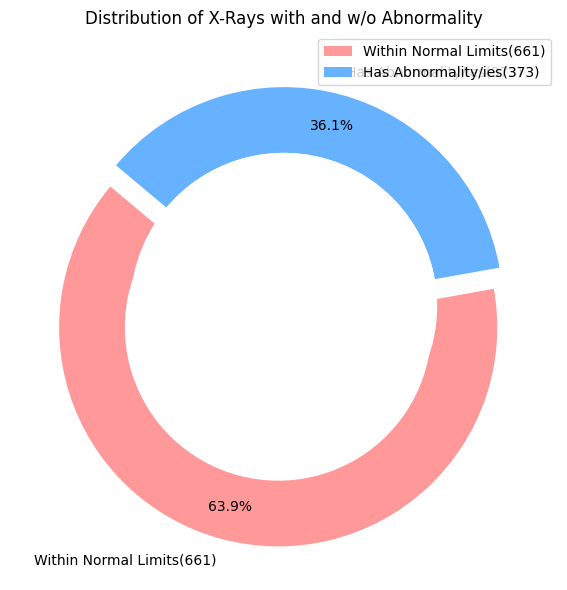

In [ ]:
# Data for the donut chart
labels = ['Within Normal Limits(661)' , 'Has Abnormality/ies(373)']
sizes = [null_count_level_five, not_null_count_level_five]
colors = ['#ff9999','#66b2ff']
explode = (0.1, 0)  # explode the 1st slice (Null Values)

# Plot the donut chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, wedgeprops=dict(width=0.3))

# Draw a circle at the center of the pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of X-Rays with and w/o Abnormality')
plt.legend(loc="best")
plt.tight_layout()
plt.show()


# Count class distribution of abnormalities with 373 data points



In [ ]:
# Provided class occurrences
occurrences = {
    'Developmental': 115,
    'Inflammation': 219,
    'Trauma': 8,
    'Benign Cyst Neoplasia': 38,
    'Metabolic/Systemic': 11,
    'Dysplasia': 8,
    'Malignant Neoplasia': 2
}

# Calculate the total occurrences
total_occurrences = sum(occurrences.values())
total_occurrences


401

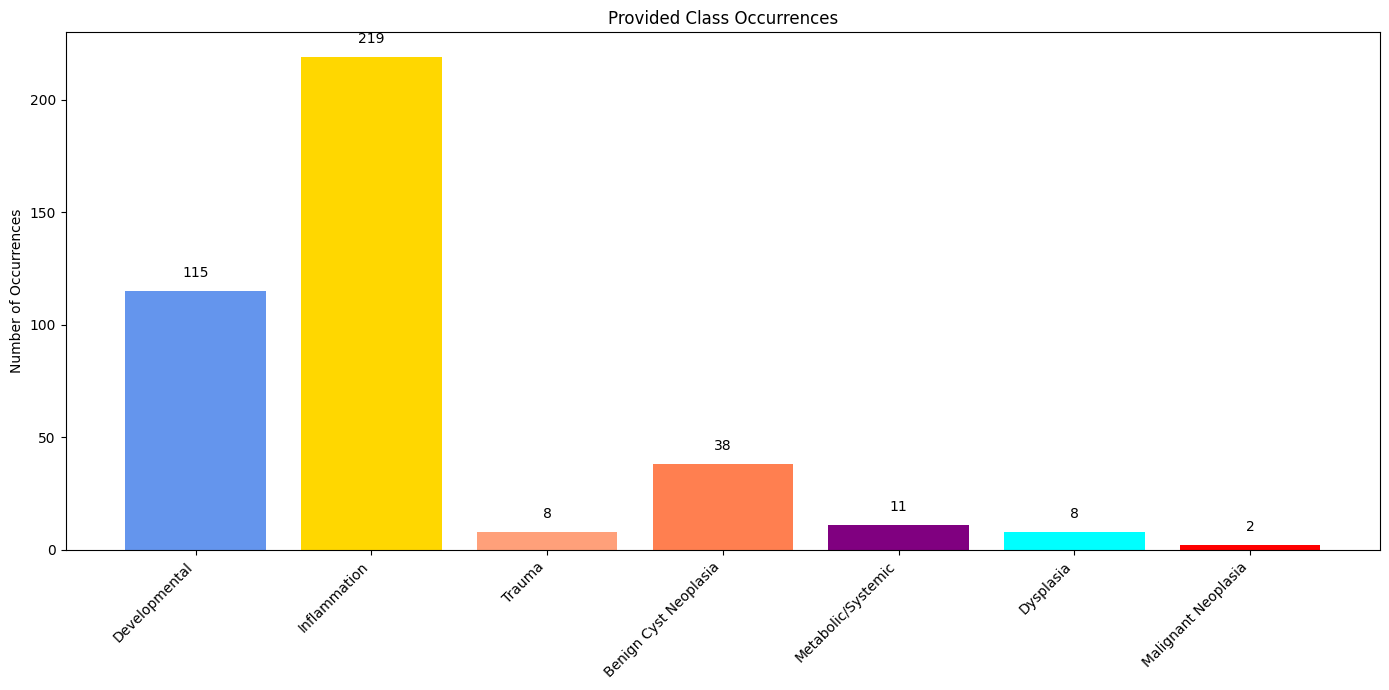

In [ ]:
# Color mapping provided by the user
color_mapping = {
    'benign_cyst_neoplasia': '#FF7F50',  # coral
    'malignant_neoplasia': '#FF0000',  # red
    'inflammation': '#FFD700',  # gold
    'dysplasia': '#00FFFF',  # aqua
    'metabolic/systemic': '#800080',  # purple
    'trauma': '#FFA07A',  # light salmon
    'developmental': '#6495ED',  # cornflower blue
    'teeth': '#008000',  # green
    'maxillomandibular': '#FFFF00'  # yellow
}

# Extract colors for the classes present in occurrences
colors = [color_mapping[cls.lower().replace(' ', '_')] for cls in occurrences.keys()]

# Plotting the class occurrences with specified colors
plt.figure(figsize=(14, 7))
bars = plt.bar(occurrences.keys(), occurrences.values(), color=colors)

# Rotate x-tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Displaying count on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)),
             ha='center', va='bottom', fontsize=10)

# Setting title and labels
plt.title("Provided Class Occurrences")
plt.ylabel("Number of Occurrences")
plt.tight_layout()

plt.show()



level_five: The most common category is "inflammation," followed by "developmental" and "benign_cyst_neoplasia." There are several other categories with fewer entries, and some entries have combinations of categories.

# Let's take consideration of differential diagnosis(2,3) as lone class

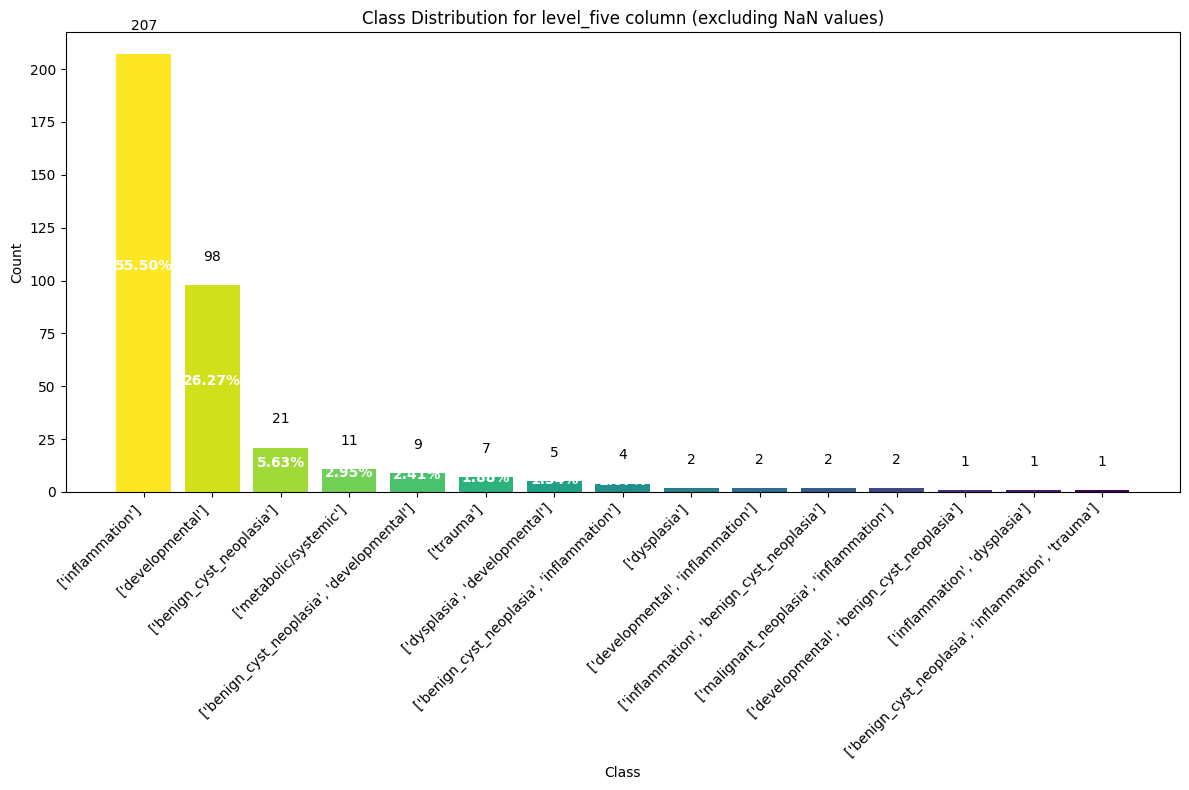

In [ ]:
import numpy as np

# Generate color palette using numpy
colors = plt.cm.viridis_r(np.linspace(0, 1, len(class_counts)))

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(class_counts.index, class_counts.values, color=colors)

# Annotate with count on top
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', color='black')

# Annotate with percentage inside the bar
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2, yval / 2, f"{percentage:.2f}%", ha='center', va='bottom', color='white', fontsize=10, fontweight='bold')

# Set title and labels
ax.set_title('Class Distribution for level_five column (excluding NaN values)')
ax.set_ylabel('Count')
ax.set_xlabel('Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



In [ ]:
# Extracting the 'External ID' for each of the other abnormalities
abnormalities = ['developmental', 'inflammation', 'trauma', 'benign_cyst_neoplasia', 'metabolic/systemic', 'dysplasia', "malignant_neoplasia"]

ids_for_abnormalities = {}
for abnormality in abnormalities:
    filtered_rows = expert_df[expert_df['level_five'].astype(str).str.contains(abnormality, case=False, na=False)]
    ids_for_abnormalities[abnormality] = filtered_rows['External ID'].values

ids_for_abnormalities


{'developmental': array(['888.JPG', '727.JPG', '181.JPG', '213.JPG', '859.JPG', '701.JPG',
        '829.JPG', '929.JPG', '383.JPG', '675.JPG', '4.JPG', '100.JPG',
        '453.JPG', '103.JPG', '360.JPG', '588.JPG', '684.JPG', '780.JPG',
        '909.JPG', '941.JPG', '398.JPG', '754.JPG', '754.JPG', '80.JPG',
        '947.JPG', '369.JPG', '497.JPG', '629.JPG', '693.JPG', '115.JPG',
        '308.JPG', '372.JPG', '500.JPG', '632.JPG', '696.JPG', '792.JPG',
        '856.JPG', '921.JPG', '407.JPG', '571.JPG', '731.JPG', '89.JPG',
        '89.JPG', '153.JPG', '924.JPG', '217.JPG', '282.JPG', '314.JPG',
        '506.JPG', '830.JPG', '285.JPG', '737.JPG', '31.JPG', '31.JPG',
        '833.JPG', '448.JPG', '512.JPG', '644.JPG', '162.JPG', '194.JPG',
        '258.JPG', '548.JPG', '5.JPG', '133.JPG', '968.JPG', '486.JPG',
        '264.JPG', '393.JPG', '393.JPG', '650.JPG', '653.JPG', '78.JPG',
        '913.JPG', '238.JPG', '367.JPG', '399.JPG', '177.JPG', '627.JPG',
        '20.JPG', '277.JPG', '8

In [ ]:
# Convert the dictionary of abnormalities and their corresponding IDs to a DataFrame for a tabular view
df_abnormalities = pd.DataFrame.from_dict(ids_for_abnormalities, orient='index').transpose()
df_abnormalities


,developmental,inflammation,trauma,benign_cyst_neoplasia,metabolic/systemic,dysplasia,malignant_neoplasia
0,888.JPG,149.JPG,310.JPG,342.JPG,634.JPG,687.JPG,336.JPG
1,727.JPG,759.JPG,281.JPG,897.JPG,748.JPG,243.JPG,532.JPG
2,181.JPG,952.JPG,734.JPG,319.JPG,363.JPG,566.JPG,None
3,213.JPG,406.JPG,364.JPG,871.JPG,600.JPG,105.JPG,None
4,859.JPG,535.JPG,685.JPG,553.JPG,895.JPG,1036.JPG,None
...,...,...,...,...,...,...,...
214,None,721.JPG,None,None,None,None,None
215,None,532.JPG,None,None,None,None,None
216,None,1036.JPG,None,None,None,None,None
217,None,1001.JPG,None,None,None,None,None


# Let's store rows with abnormality on a new dataframe

In [ ]:
# Filter rows where Description is not 'Within normal limits'
abnormal_df = expert_df[expert_df['Description'] != 'Within normal limits']

# Display the first few rows of the filtered data
abnormal_df.head()


,External ID,Description,polygons,level_one,level_two,level_three,level_four,level_five
660,888.JPG,There is a defined dense radiopacity in the ri...,"[[[533, 685], [533, 686], [532, 687], [532, 68...",non-odontogenic,well_defined,radiopaque,NaN,['developmental']
661,149.JPG,There is a defind non corticated apical radiol...,"[[[671, 625], [670, 626], [670, 628], [669, 62...",periapical,well_defined,radiolucent,NaN,['inflammation']
662,727.JPG,There is a defined dense radiopacity noted in ...,"[[[1091, 594], [1088, 597], [1088, 598], [1086...",non-odontogenic,well_defined,radiopaque,NaN,['developmental']
663,759.JPG,There is an apical radiolucency associated wit...,"[[[592, 579], [591, 580], [588, 580], [587, 58...",periapical,well_defined,radiolucent,NaN,['inflammation']
664,181.JPG,Number 1 there is widening of follicular space...,"[[[488, 528], [486, 530], [486, 531], [485, 53...",inter-radicular,well_defined,radiopaque,NaN,['developmental']


# in the cell below, we will remove inflammation or developmental if found in the rows where the length is 2. just save to csv if necessary.

In [100]:
# Refined function to handle potential non-string types and remove 'inflammation' or 'developmental'
def refined_remove_values(value):
    # Check if the value is not a string
    if not isinstance(value, str):
        return value
    # Convert the value to a list of strings by stripping and splitting
    value_list = [item.strip() for item in value.strip("[]").split(",")]
    if "inflammation" in value_list:
        value_list.remove("inflammation")
    if "developmental" in value_list:
        value_list.remove("developmental")
    return value_list[0] if value_list else None  # Return the remaining item or None if the list is empty

# Apply the refined function to the level_five column
expert_df['level_five'] = abnormal_df['level_five'].apply(refined_remove_values)

# Display the updated dataframe
expert_df.tail(20)
expert_df.to_csv('cleaned_diff_diagnosis_removed.csv', index=False)


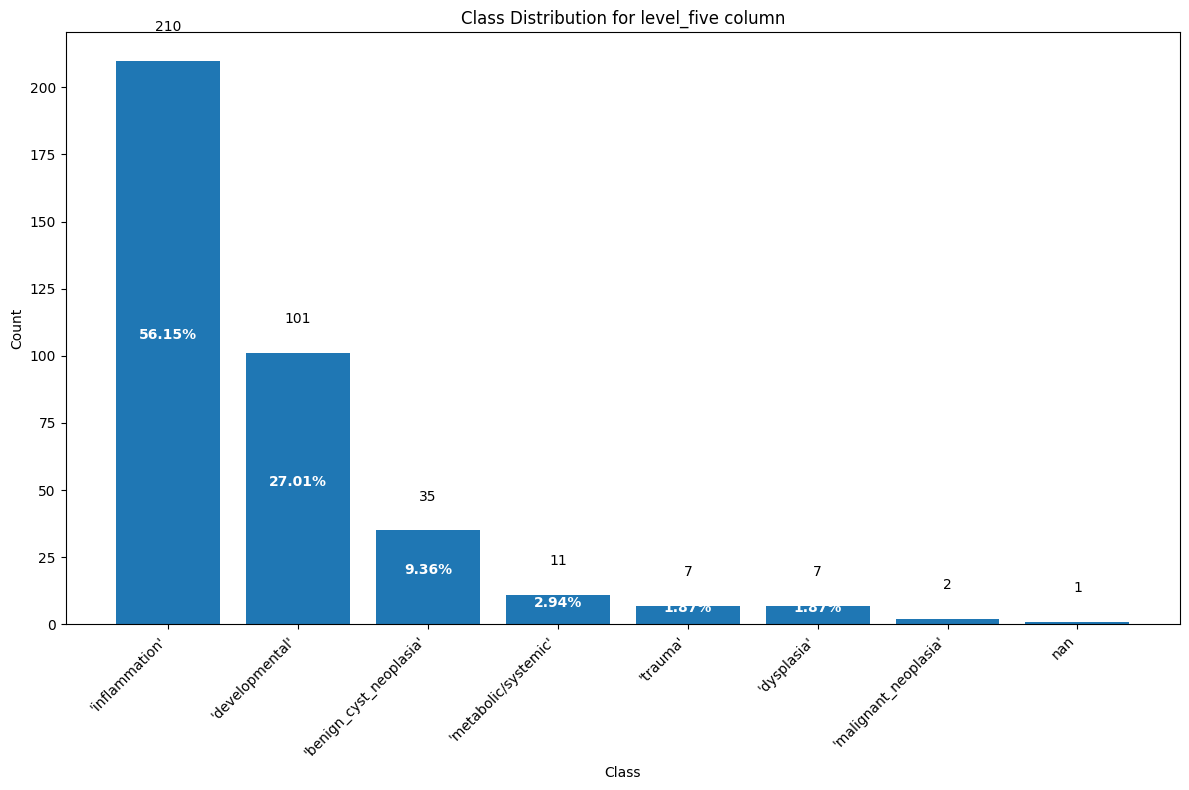

In [101]:
# Count the occurrences of each class in the level_five column
class_counts = expert_df['level_five'].value_counts()

# Calculate the total for percentage calculation
total = class_counts.sum()

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(class_counts.index, class_counts.values)

# Annotate with count on top
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', color='black')

# Annotate with percentage inside the bar
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2, yval / 2, f"{percentage:.2f}%", ha='center', va='bottom', color='white', fontsize=10, fontweight='bold')

# Set title and labels
ax.set_title('Class Distribution for level_five column')
ax.set_ylabel('Count')
ax.set_xlabel('Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [95]:
# Filter rows where Description is not 'Within normal limits'
abnormal_df = expert_df[expert_df['Description'] != 'Within normal limits']

# Display the first few rows of the filtered data
abnormal_df.head()


,External ID,Description,polygons,level_one,level_two,level_three,level_four,level_five
660,888.JPG,There is a defined dense radiopacity in the ri...,"[[[533, 685], [533, 686], [532, 687], [532, 68...",non-odontogenic,well_defined,radiopaque,NaN,'developmental'
661,149.JPG,There is a defind non corticated apical radiol...,"[[[671, 625], [670, 626], [670, 628], [669, 62...",periapical,well_defined,radiolucent,NaN,'inflammation'
662,727.JPG,There is a defined dense radiopacity noted in ...,"[[[1091, 594], [1088, 597], [1088, 598], [1086...",non-odontogenic,well_defined,radiopaque,NaN,'developmental'
663,759.JPG,There is an apical radiolucency associated wit...,"[[[592, 579], [591, 580], [588, 580], [587, 58...",periapical,well_defined,radiolucent,NaN,'inflammation'
664,181.JPG,Number 1 there is widening of follicular space...,"[[[488, 528], [486, 530], [486, 531], [485, 53...",inter-radicular,well_defined,radiopaque,NaN,'developmental'


In [ ]:
abnormal_df.describe()

,External ID,Description,polygons,level_one,level_two,level_three,level_four,level_five
count,374,373,373,373,373,366,64,374
unique,340,332,373,4,2,3,5,16
top,89.JPG,Mucous retention pseudocyst in the right maxil...,"[[[533, 685], [533, 686], [532, 687], [532, 68...",periapical,well_defined,radiopaque,root_resporation,['inflammation']
freq,4,4,1,216,230,127,32,207


In [ ]:
#let us drop the polygons first before proceeding to exploring deeper
# Dropping the 'polygons' column
abnormal_df = abnormal_df.drop(columns=['polygons'])

# Displaying the first few rows of the updated dataframe
abnormal_df.head()


,External ID,Description,level_one,level_two,level_three,level_four,level_five
660,888.JPG,There is a defined dense radiopacity in the ri...,non-odontogenic,well_defined,radiopaque,NaN,['developmental']
661,149.JPG,There is a defind non corticated apical radiol...,periapical,well_defined,radiolucent,NaN,['inflammation']
662,727.JPG,There is a defined dense radiopacity noted in ...,non-odontogenic,well_defined,radiopaque,NaN,['developmental']
663,759.JPG,There is an apical radiolucency associated wit...,periapical,well_defined,radiolucent,NaN,['inflammation']
664,181.JPG,Number 1 there is widening of follicular space...,inter-radicular,well_defined,radiopaque,NaN,['developmental']


# Let's explore the class distribution for each column

# Let's explain first the diagnosis for every level:(multi-modal)

When abnormality is found, characteristics was recorded in five different levels:

anatomical location- location relative to the jaw and teeth,

peripheral characteristics-periphery(area outline) of abnormality; well-defined or ill-defined,

Radiodensity- internal architecture; radiolucent is dense and shows on xray (ex. teeth bone), radiopaque is less dense and does not show on xray (ex. skin and muscle)

effects of abnormality on the surrounding structure- recorded in terms of tooth displacement, root resorption, osseous thinning and expansion, and extension into the adjacent soft tissue or degenerative changes, and the

abnormality category- Trauma, Inflammation, Dysplasia, Develop-
mental, Benign tumor or Cyst, Malignant Neoplasia, Systemic
or Metabolic conditions.


In [ ]:
# Value counts for categorical columns
value_counts = {}

# Getting value counts for each categorical column (excluding the 'External ID' and 'Description' columns for brevity)
columns_to_check = ['level_one', 'level_two', 'level_three', 'level_four', 'level_five']

for column in columns_to_check:
    value_counts[column] = abnormal_df[column].value_counts()

value_counts


{'level_one': periapical         216
 non-odontogenic    105
 pericoronal         48
 inter-radicular      4
 Name: level_one, dtype: int64,
 'level_two': well_defined    230
 ill_defined     143
 Name: level_two, dtype: int64,
 'level_three': radiopaque                    127
 radiolucent                   127
 mixed-septae/calcification    112
 Name: level_three, dtype: int64,
 'level_four': root_resporation              32
 thinning                      20
 degeneration                   9
 osseous_expansion              2
 expansion_into_soft_tissue     1
 Name: level_four, dtype: int64,
 'level_five': ['inflammation']                                       207
 ['developmental']                                       98
 ['benign_cyst_neoplasia']                               21
 ['metabolic/systemic']                                  11
 ['benign_cyst_neoplasia', 'developmental']               9
 ['trauma']                                               7
 ['dysplasia', 'development

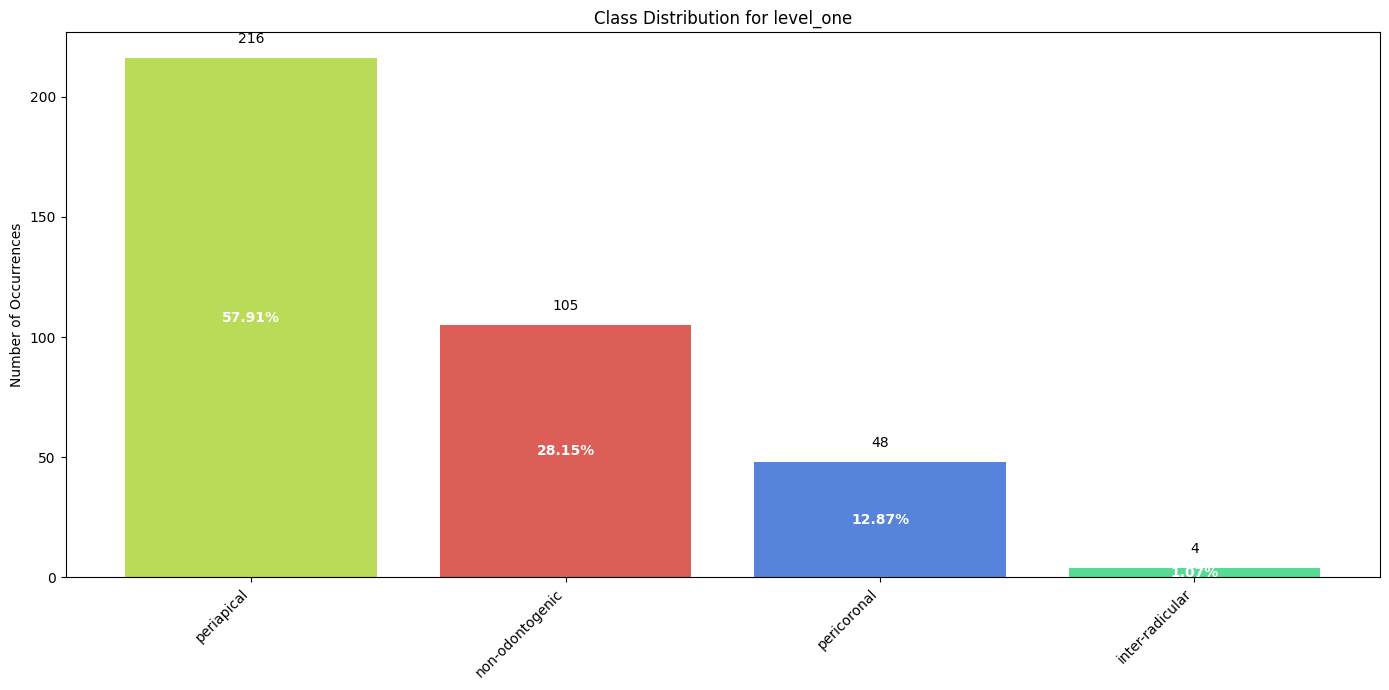

In [ ]:
def plot_class_distribution_with_counts(column_name, palette):
    """Plot class distribution of the specified column with counts on top of bars and percentages inside."""
    occurrences = abnormal_df[column_name].value_counts().to_dict()
    total = sum(occurrences.values())

    # Generate distinct colors for each category
    unique_categories = abnormal_df[column_name].unique()
    category_colors = dict(zip(unique_categories, sns.color_palette(palette, n_colors=len(unique_categories))))

    # Extract colors for the classes present in occurrences
    colors = [category_colors[cls] for cls in occurrences.keys()]

    # Plotting the class occurrences with specified colors
    plt.figure(figsize=(14, 7))
    bars = plt.bar(occurrences.keys(), occurrences.values(), color=colors)

    # Rotate x-tick labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Displaying percentages inside each bar
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total) * 100
        plt.text(bar.get_x() + bar.get_width()/2, height/2, f"{percentage:.2f}%",
                 ha='center', va='center', fontsize=10, color='white', weight='bold')
        plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)),
                 ha='center', va='bottom', fontsize=10)

    # Setting title and labels
    plt.title(f"Class Distribution for {column_name}")
    plt.ylabel("Number of Occurrences")
    plt.tight_layout()

    plt.show()

# Displaying class distribution for 'level_one'
plot_class_distribution_with_counts("level_one", "hls")


level_one: The majority of the data falls under "periapical," followed by "non-odontogenic," "pericoronal," and a few in "inter-radicular." l


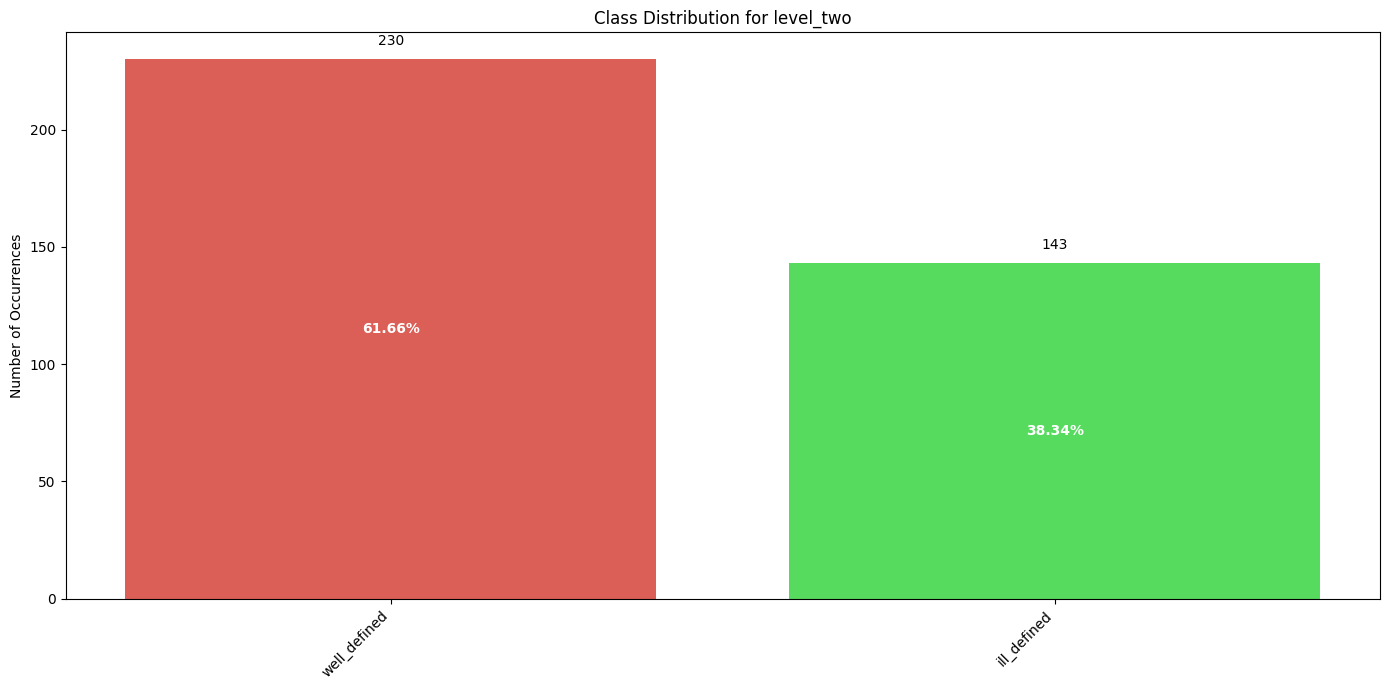

In [ ]:
# Displaying class distribution for 'level_two'
plot_class_distribution_with_counts("level_two", "hls")


level_two: The data is almost evenly split between "well_defined" and "ill_defined," with "well_defined" being slightly more frequent.


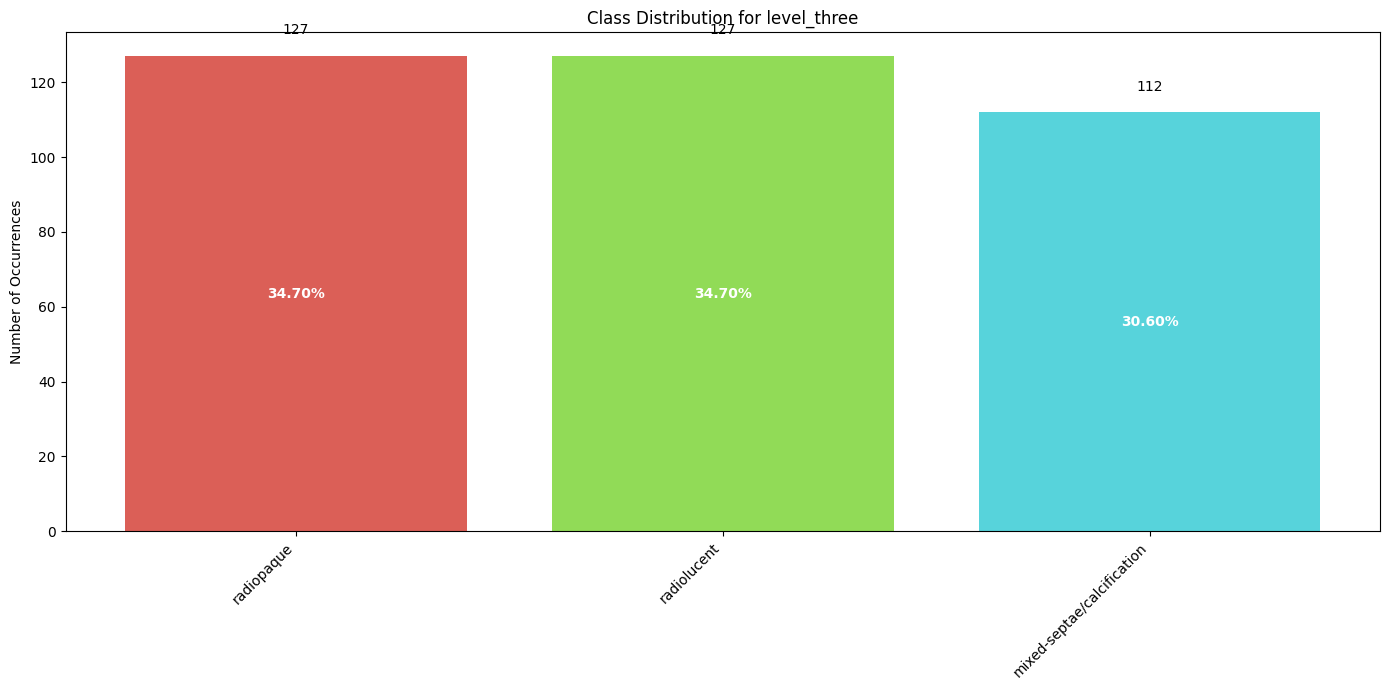

In [ ]:
# Displaying class distribution for 'level_three'
plot_class_distribution_with_counts("level_three", "hls")


level_three: The distribution among "radiopaque," "radiolucent," and "mixed-septae/calcification" is fairly even.

radiopaque: 127 entries
radiolucent: 127 entries
mixed-septae/calcification: 112 entries

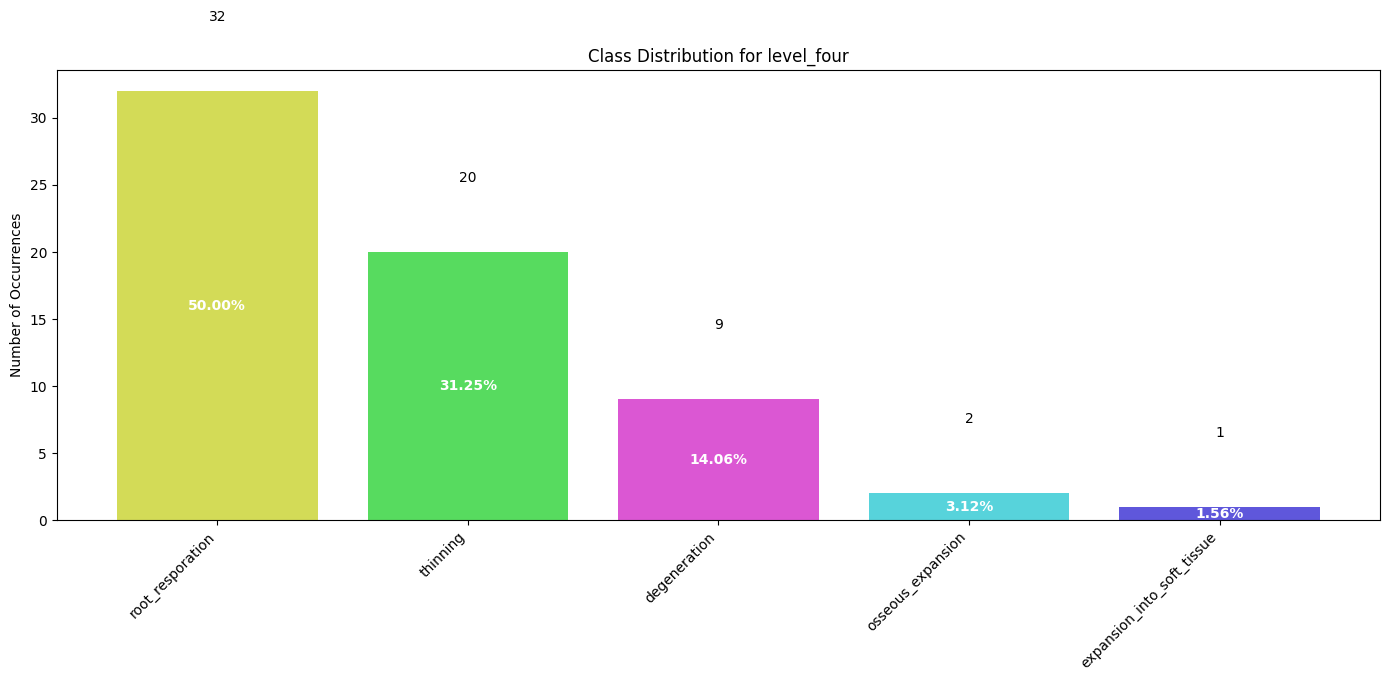

In [ ]:
# Displaying class distribution for 'level_four'
plot_class_distribution_with_counts("level_four", "hls")


level_four: Most of the entries are missing in this column. Among the present ones, "root_resporation" is the most common, followed by "thinning" and "degeneration."
root_resporation: 32 entries
thinning: 20 entries
degeneration: 9 entries
osseous_expansion: 2 entries
expansion_into_soft_tissue: 1 entry


# Let's perform correlation matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding the categorical columns
label_encoded_df = abnormal_df.copy()
label_encoders = {}  # Storing the label encoders for potential inverse transformations

for column in columns_to_check:
    le = LabelEncoder()
    label_encoded_df[column] = le.fit_transform(label_encoded_df[column].astype(str))
    label_encoders[column] = le

# Computing the correlation matrix for the label encoded columns
label_encoded_correlation = label_encoded_df[columns_to_check].corr()

# Displaying the correlation matrix
label_encoded_correlation


,level_one,level_two,level_three,level_four,level_five
level_one,1.000000,-0.144978,-0.288468,0.198523,-0.207863
level_two,-0.144978,1.000000,0.738713,-0.083484,-0.515399
level_three,-0.288468,0.738713,1.000000,-0.116994,-0.401789
level_four,0.198523,-0.083484,-0.116994,1.000000,-0.113851
level_five,-0.207863,-0.515399,-0.401789,-0.113851,1.000000


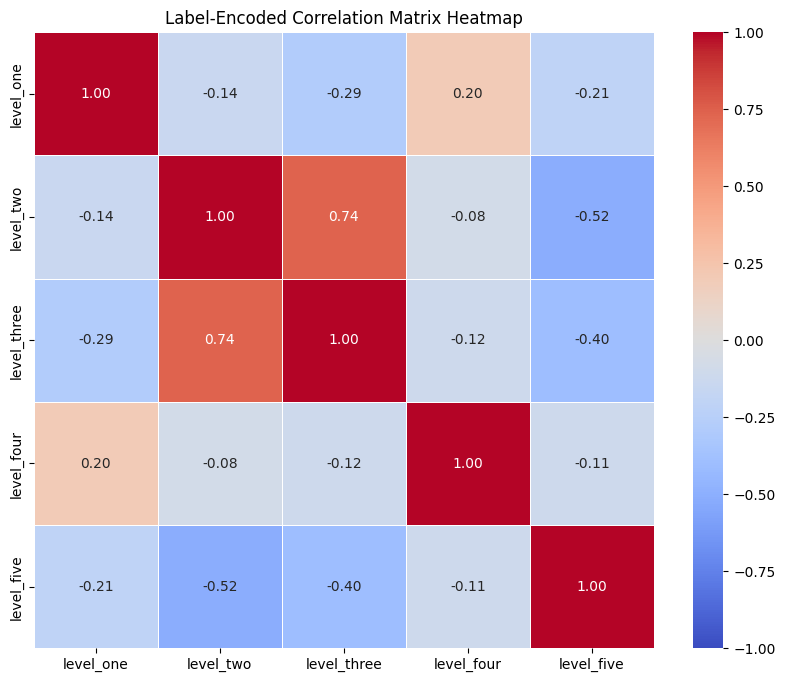

In [ ]:
# Plotting a heatmap for the label-encoded correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(label_encoded_correlation, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Label-Encoded Correlation Matrix Heatmap")
plt.show()


# Let's see the distribution of level_1 to level_4 respective to level_5

In [105]:
# Drop the 'description' and 'polygons' columns
abnormal_df = abnormal_df.drop(columns=['Description', 'polygons'])

# Display the first few rows of the updated dataframe
abnormal_df.head()


,External ID,level_one,level_two,level_three,level_four,level_five
660,888.JPG,non-odontogenic,well_defined,radiopaque,NaN,'developmental'
661,149.JPG,periapical,well_defined,radiolucent,NaN,'inflammation'
662,727.JPG,non-odontogenic,well_defined,radiopaque,NaN,'developmental'
663,759.JPG,periapical,well_defined,radiolucent,NaN,'inflammation'
664,181.JPG,inter-radicular,well_defined,radiopaque,NaN,'developmental'


# Identify the unique classes in the level_five column.
Create separate dataframes for each class.
Display the dataframe for each class.I

# Plot class distribution of each level(1-4) for each abnormality

Dataframe for class: developmental


,External ID,level_one,level_two,level_three,level_four,level_five
660,888.JPG,non-odontogenic,well_defined,radiopaque,NaN,'developmental'
662,727.JPG,non-odontogenic,well_defined,radiopaque,NaN,'developmental'
664,181.JPG,inter-radicular,well_defined,radiopaque,NaN,'developmental'
666,213.JPG,inter-radicular,well_defined,radiopaque,NaN,'developmental'
673,859.JPG,non-odontogenic,well_defined,radiopaque,NaN,'developmental'
678,701.JPG,pericoronal,well_defined,radiolucent,NaN,'developmental'
680,829.JPG,non-odontogenic,well_defined,radiolucent,NaN,'developmental'
692,929.JPG,non-odontogenic,well_defined,NaN,NaN,'developmental'
694,383.JPG,periapical,well_defined,radiopaque,NaN,'developmental'
696,675.JPG,pericoronal,well_defined,radiolucent,thinning,'developmental'



--------------------------------------------------------------------------------



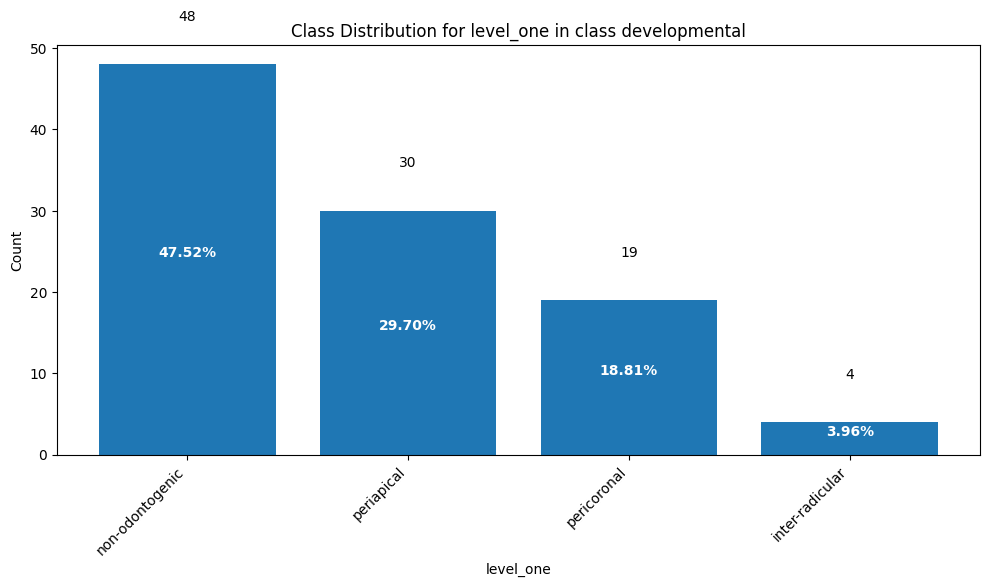

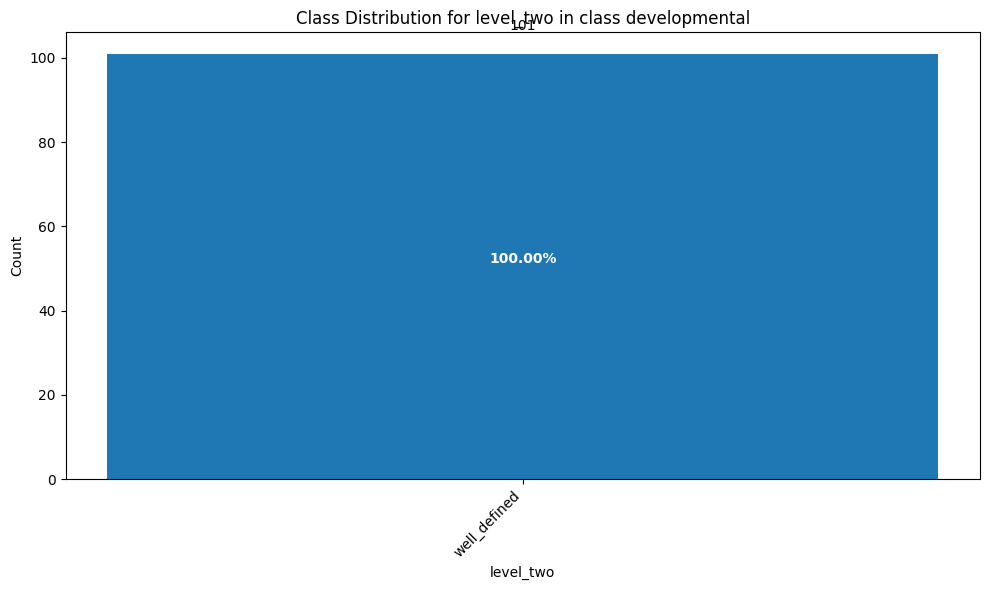

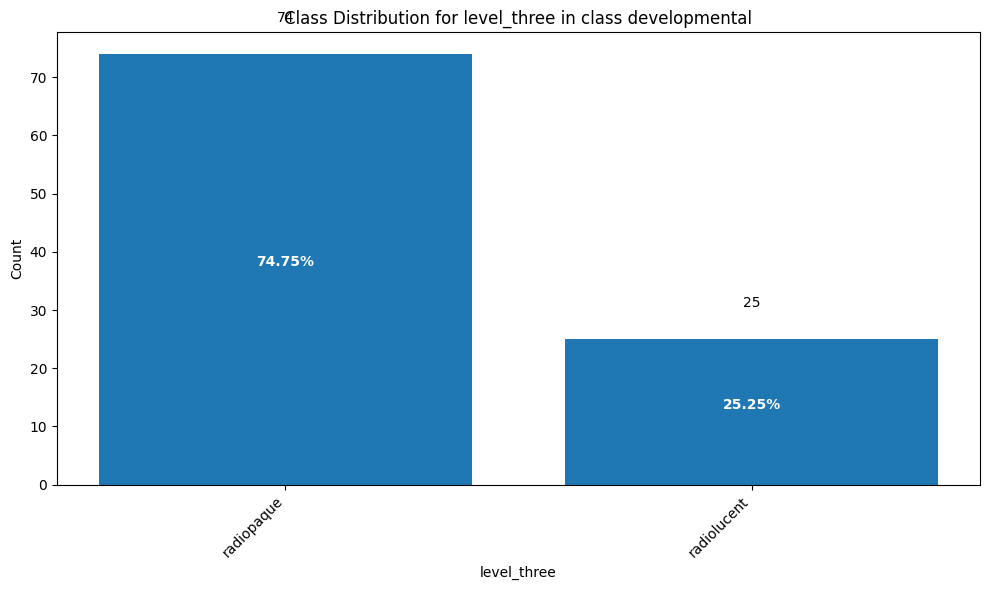

<ipython-input-134-4c9852e2c54a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


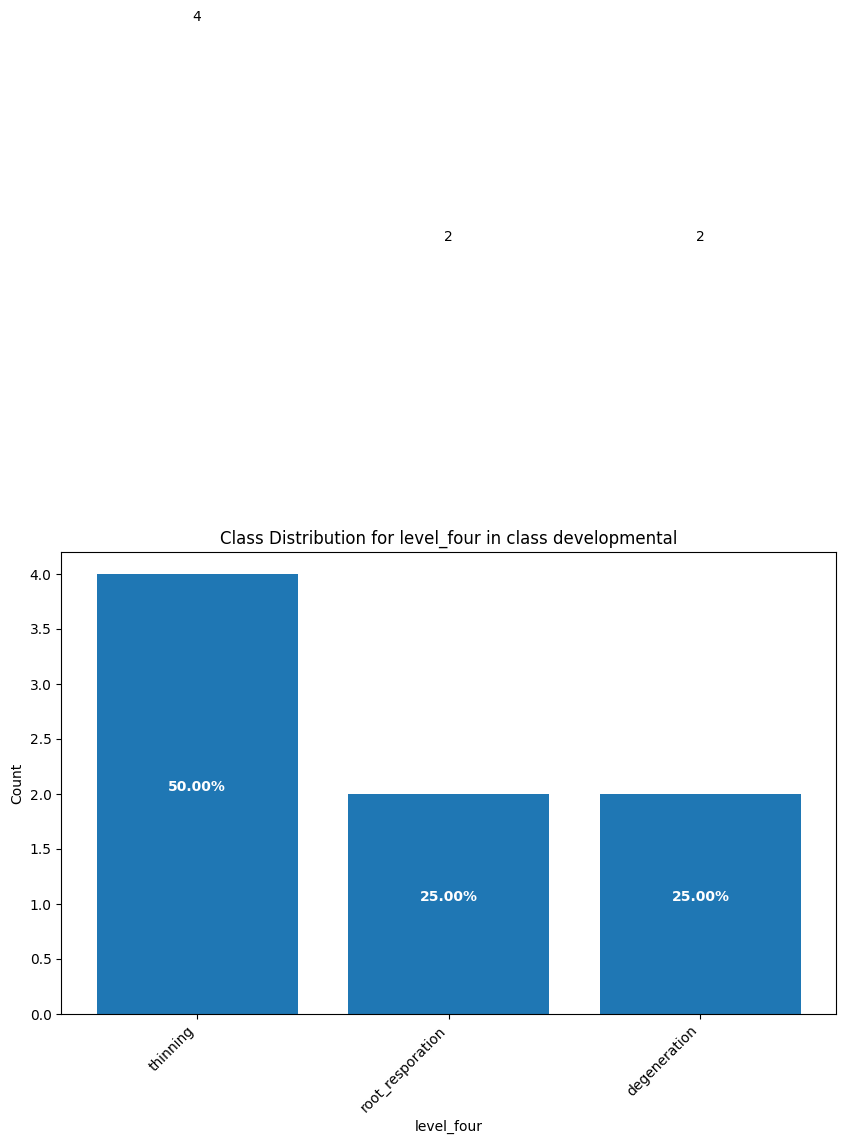

Dataframe for class: inflammation


,External ID,level_one,level_two,level_three,level_four,level_five
661,149.JPG,periapical,well_defined,radiolucent,NaN,'inflammation'
663,759.JPG,periapical,well_defined,radiolucent,NaN,'inflammation'
665,952.JPG,periapical,well_defined,radiolucent,NaN,'inflammation'
669,406.JPG,periapical,well_defined,radiolucent,root_resporation,'inflammation'
670,535.JPG,periapical,well_defined,radiolucent,root_resporation,'inflammation'
672,698.JPG,periapical,well_defined,radiopaque,NaN,'inflammation'
674,216.JPG,periapical,ill_defined,radiolucent,NaN,'inflammation'
676,573.JPG,periapical,ill_defined,radiolucent,root_resporation,'inflammation'
677,637.JPG,periapical,well_defined,radiolucent,root_resporation,'inflammation'
679,59.JPG,periapical,well_defined,radiolucent,root_resporation,'inflammation'



--------------------------------------------------------------------------------



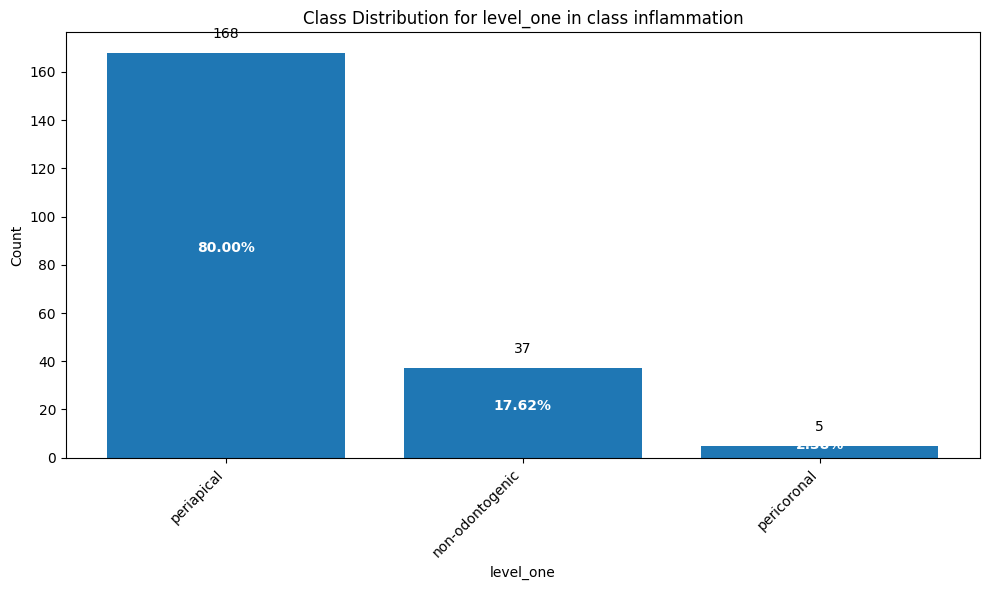

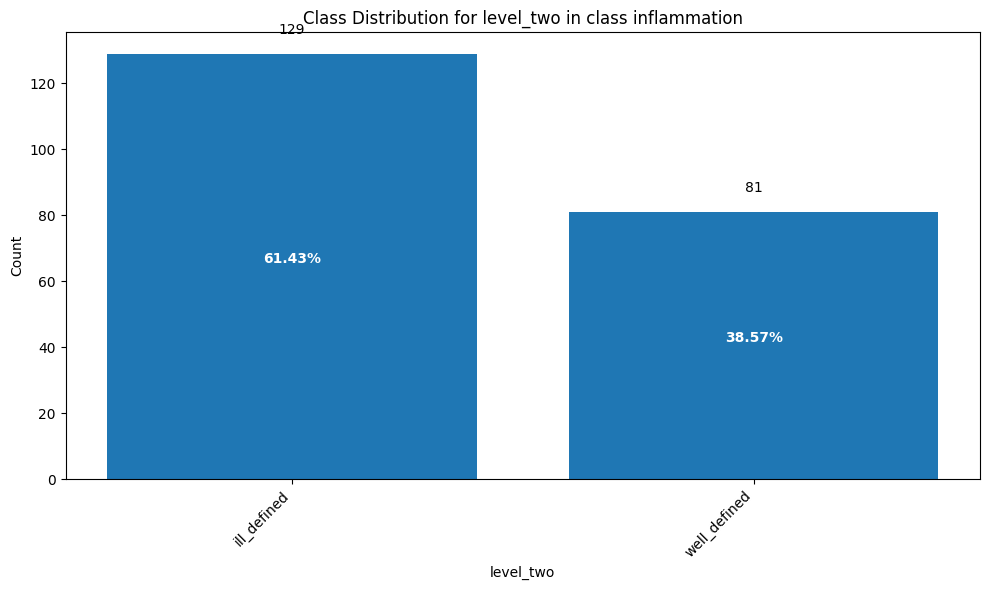

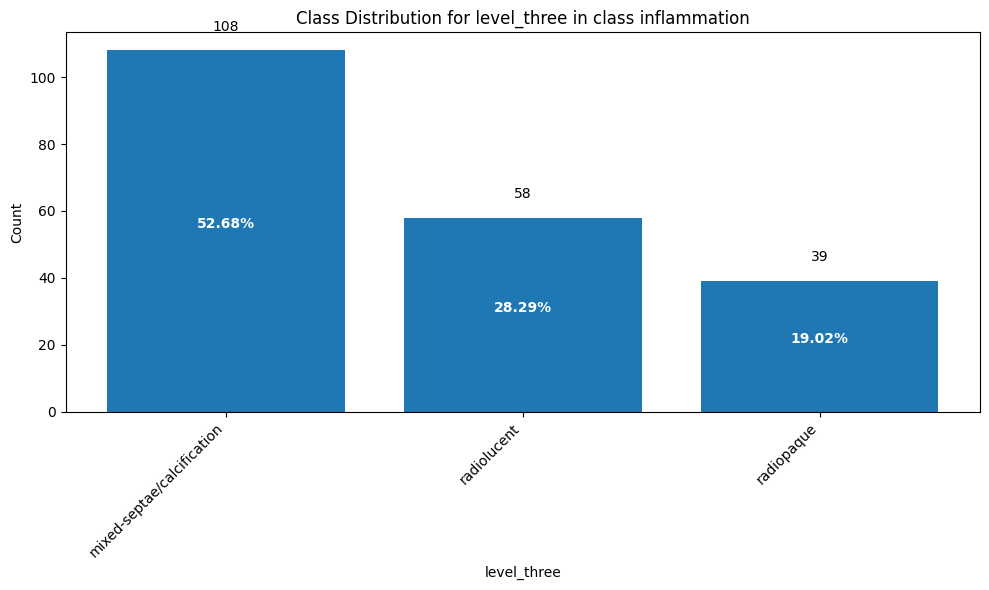

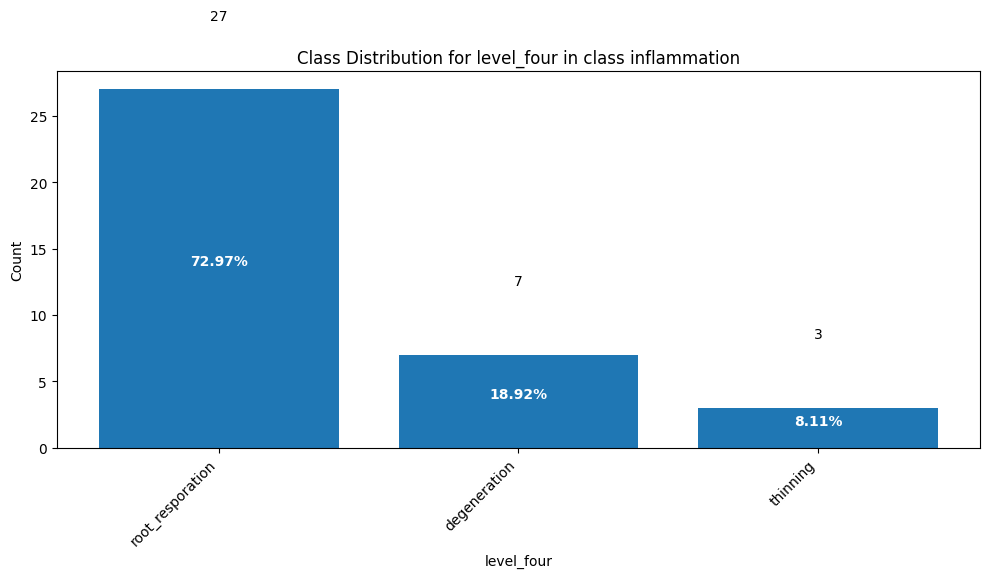

Dataframe for class: trauma


,External ID,level_one,level_two,level_three,level_four,level_five
667,310.JPG,non-odontogenic,well_defined,radiopaque,NaN,'trauma'
675,281.JPG,periapical,ill_defined,radiolucent,NaN,'trauma'
820,734.JPG,periapical,well_defined,radiolucent,NaN,'trauma'
887,364.JPG,non-odontogenic,well_defined,radiopaque,NaN,'trauma'
894,685.JPG,non-odontogenic,well_defined,radiopaque,NaN,'trauma'
906,463.JPG,non-odontogenic,well_defined,radiopaque,NaN,'trauma'
966,648.JPG,periapical,well_defined,radiolucent,NaN,'trauma'



--------------------------------------------------------------------------------



<ipython-input-134-4c9852e2c54a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


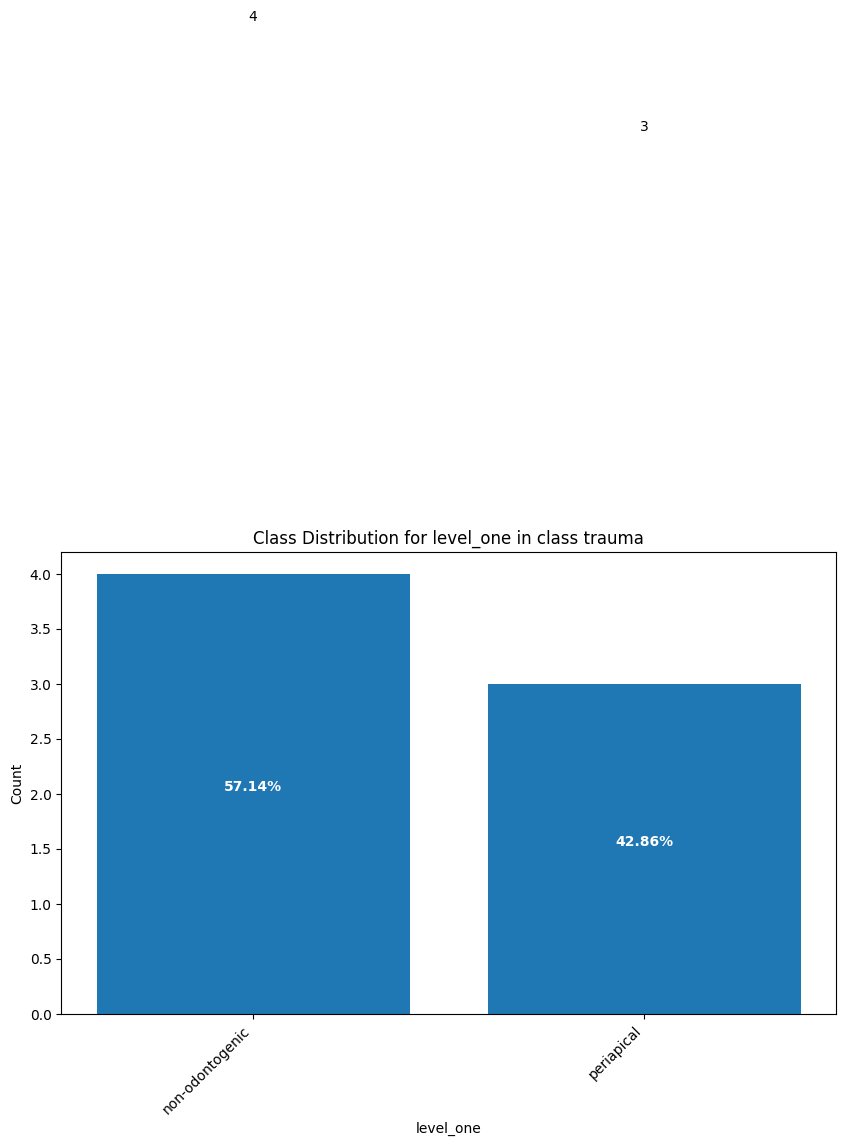

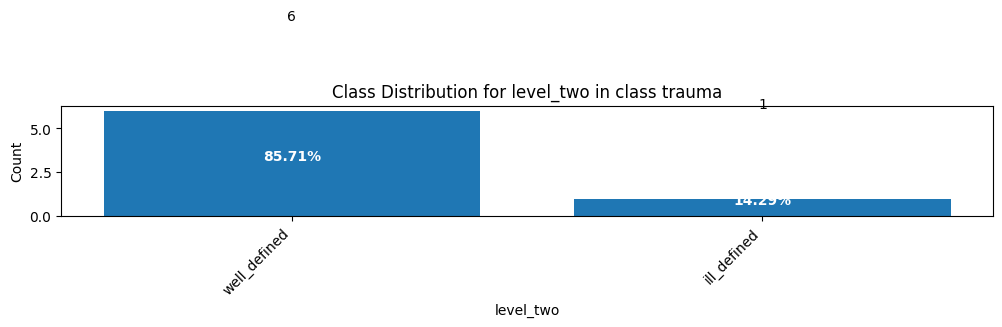

<ipython-input-134-4c9852e2c54a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


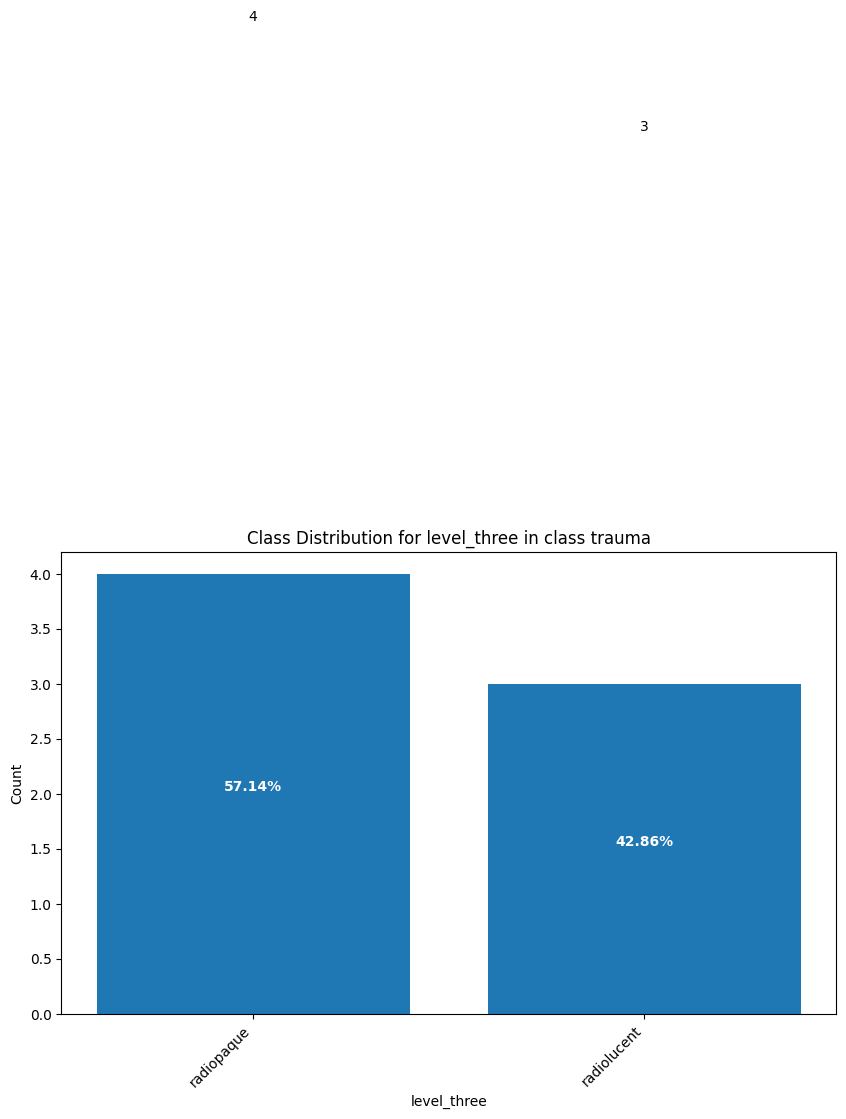

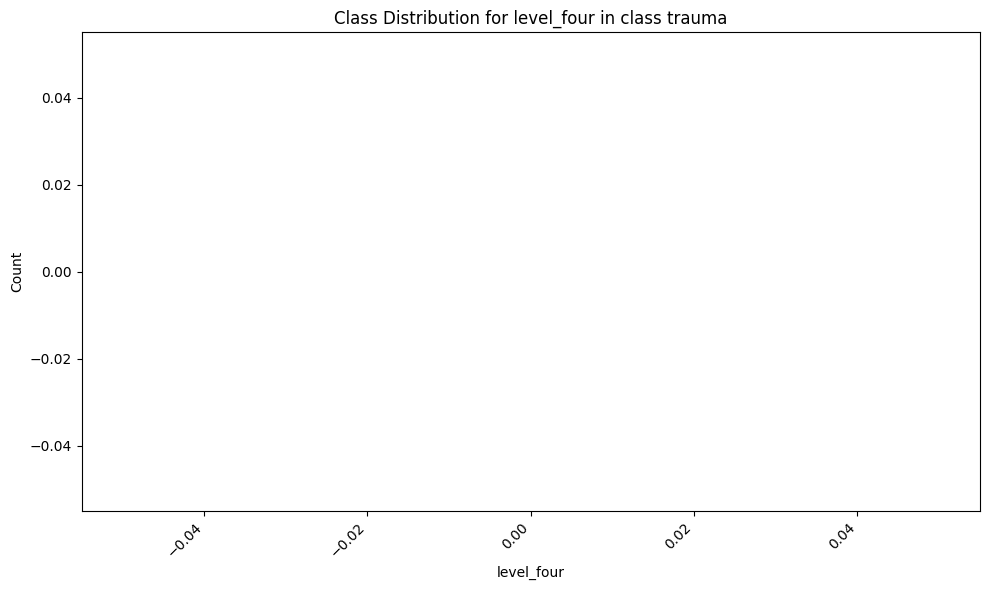

Dataframe for class: benign_cyst_neoplasia


,External ID,level_one,level_two,level_three,level_four,level_five
668,342.JPG,non-odontogenic,well_defined,radiopaque,NaN,'benign_cyst_neoplasia'
690,897.JPG,pericoronal,well_defined,radiolucent,osseous_expansion,'benign_cyst_neoplasia'
693,319.JPG,pericoronal,well_defined,radiolucent,NaN,'benign_cyst_neoplasia'
704,871.JPG,pericoronal,well_defined,radiolucent,NaN,'benign_cyst_neoplasia'
714,553.JPG,non-odontogenic,well_defined,radiolucent,NaN,'benign_cyst_neoplasia'
747,594.JPG,periapical,ill_defined,radiolucent,NaN,'benign_cyst_neoplasia'
774,950.JPG,periapical,ill_defined,radiolucent,NaN,'benign_cyst_neoplasia'
805,89.JPG,pericoronal,well_defined,radiolucent,root_resporation,'benign_cyst_neoplasia'
810,217.JPG,pericoronal,well_defined,radiolucent,NaN,'benign_cyst_neoplasia'
811,217.JPG,pericoronal,well_defined,radiolucent,NaN,'benign_cyst_neoplasia'



--------------------------------------------------------------------------------



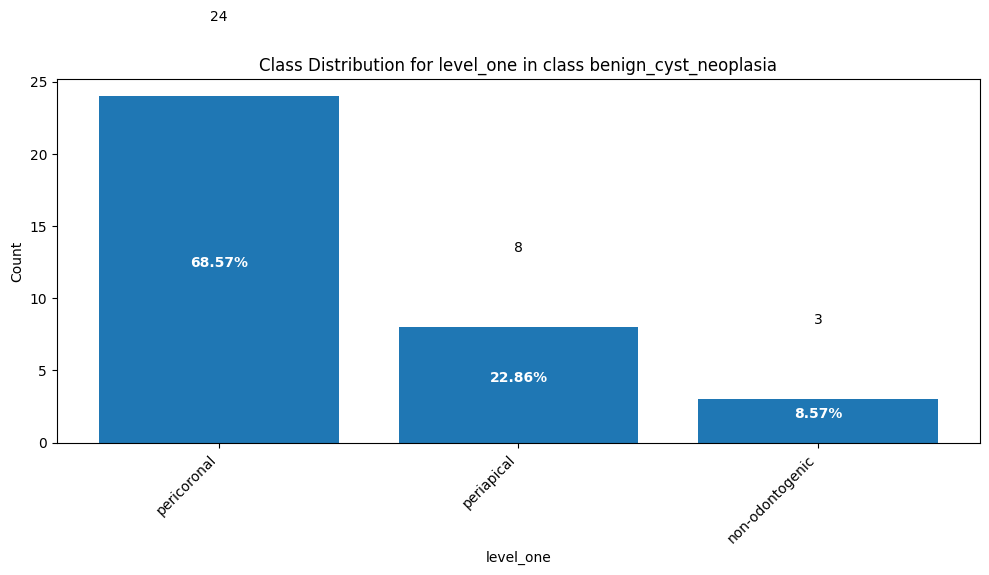

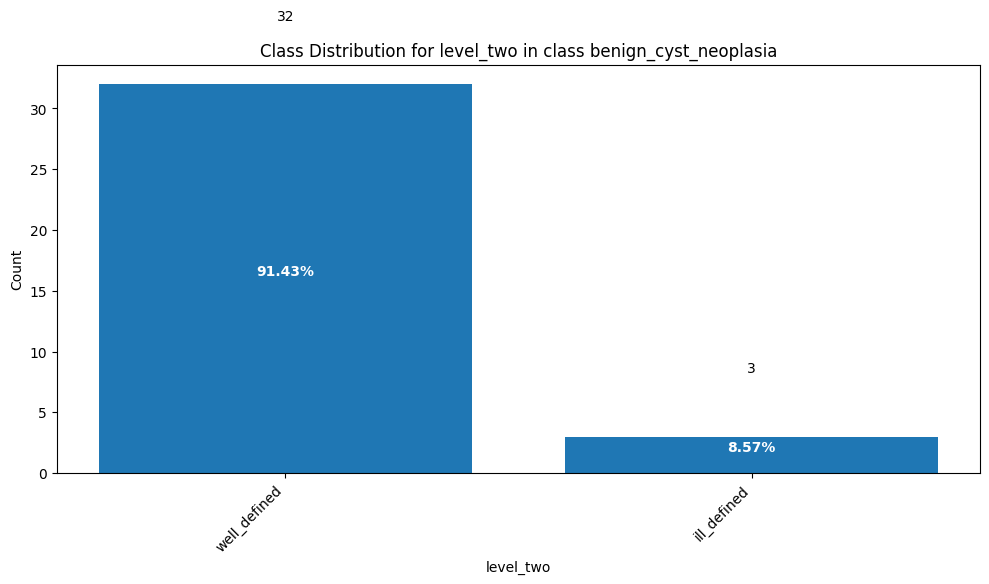

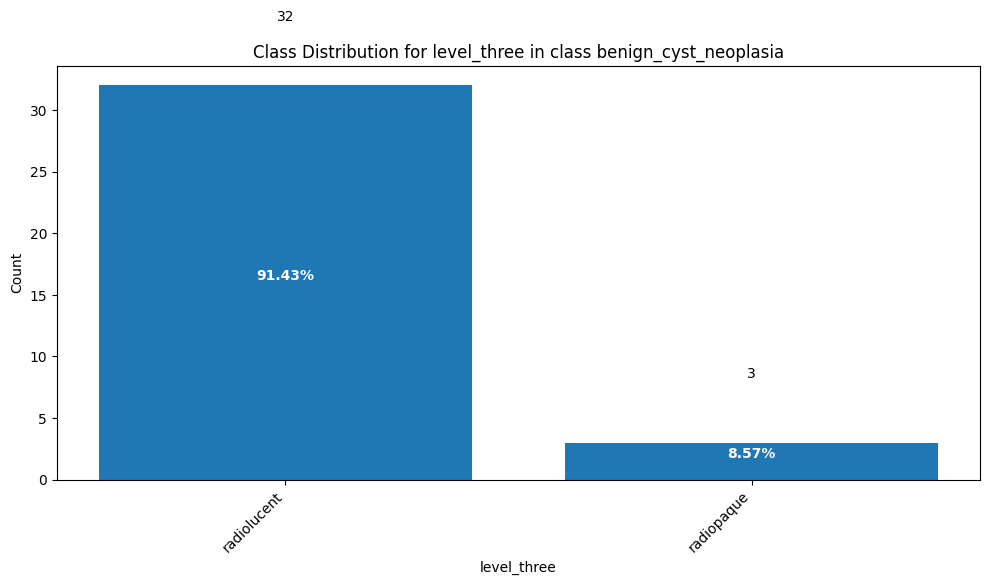

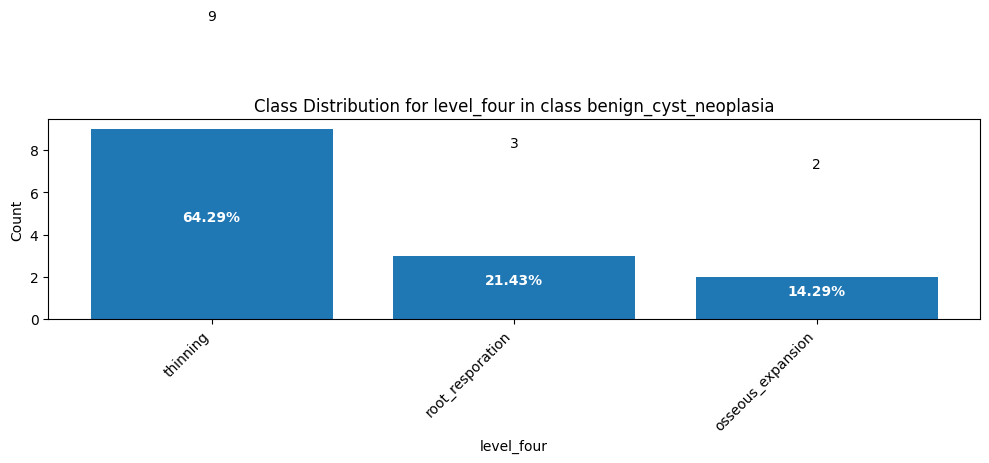

Dataframe for class: metabolic/systemic


,External ID,level_one,level_two,level_three,level_four,level_five
671,634.JPG,non-odontogenic,ill_defined,radiolucent,thinning,'metabolic/systemic'
719,748.JPG,non-odontogenic,ill_defined,radiolucent,NaN,'metabolic/systemic'
733,363.JPG,non-odontogenic,ill_defined,radiolucent,NaN,'metabolic/systemic'
783,600.JPG,non-odontogenic,ill_defined,radiopaque,expansion_into_soft_tissue,'metabolic/systemic'
823,895.JPG,non-odontogenic,ill_defined,radiolucent,NaN,'metabolic/systemic'
883,139.JPG,non-odontogenic,ill_defined,radiolucent,thinning,'metabolic/systemic'
886,203.JPG,non-odontogenic,ill_defined,radiolucent,thinning,'metabolic/systemic'
890,525.JPG,non-odontogenic,ill_defined,radiolucent,thinning,'metabolic/systemic'
907,528.JPG,non-odontogenic,well_defined,mixed-septae/calcification,NaN,'metabolic/systemic'
1003,1047.JPG,non-odontogenic,well_defined,radiopaque,NaN,'metabolic/systemic'



--------------------------------------------------------------------------------



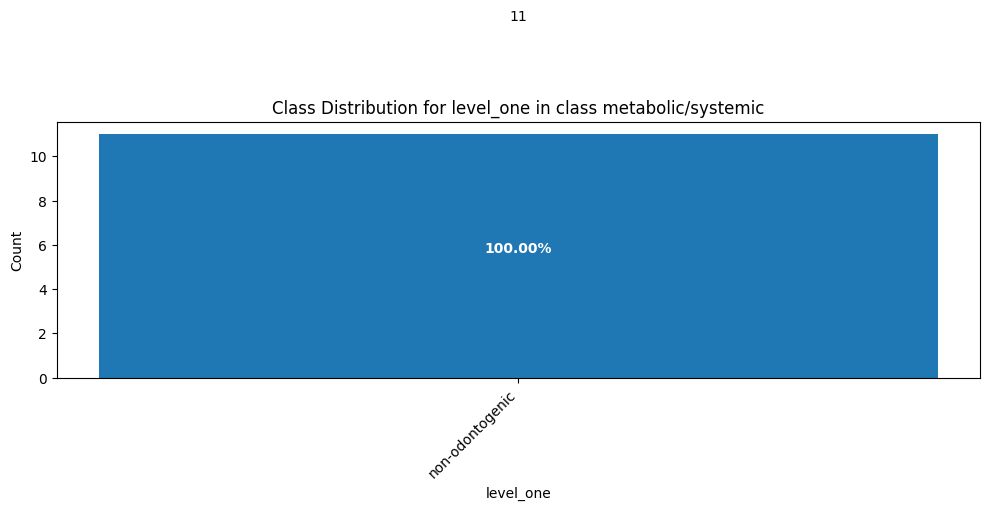

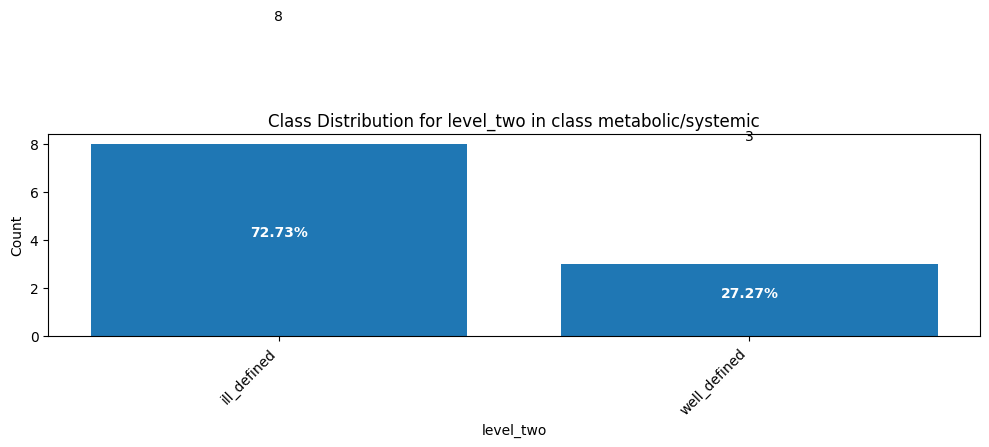

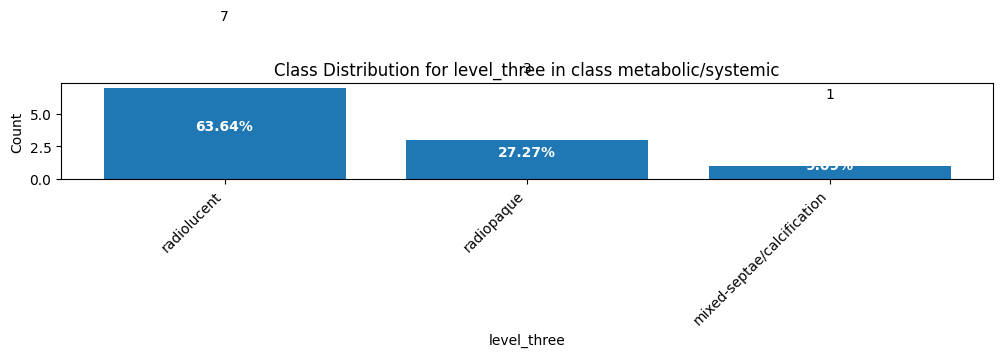

<ipython-input-134-4c9852e2c54a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


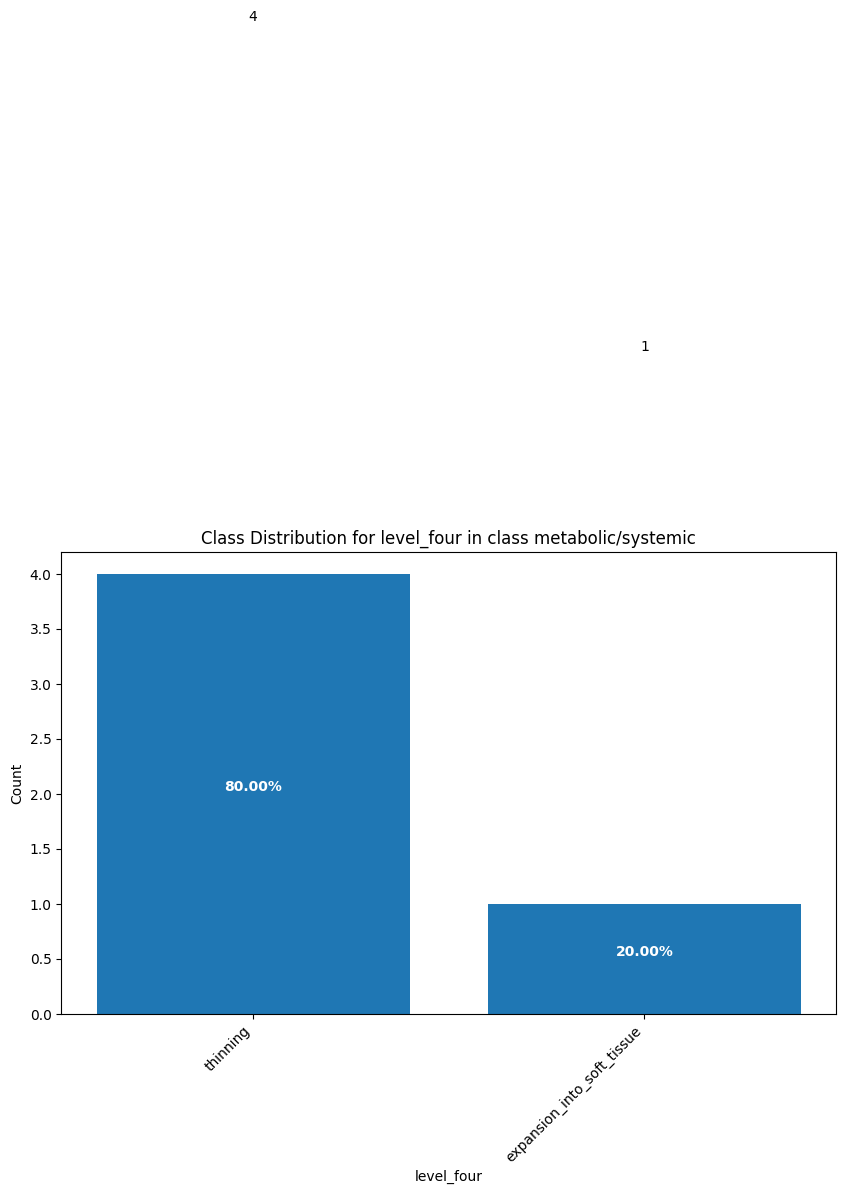

Dataframe for class: dysplasia


,External ID,level_one,level_two,level_three,level_four,level_five
736,687.JPG,periapical,well_defined,mixed-septae/calcification,NaN,'dysplasia'
775,243.JPG,periapical,well_defined,radiopaque,NaN,'dysplasia'
1019,566.JPG,non-odontogenic,well_defined,radiopaque,NaN,'dysplasia'
1022,105.JPG,periapical,well_defined,radiopaque,NaN,'dysplasia'
1028,1037.JPG,periapical,well_defined,radiopaque,NaN,'dysplasia'
1031,255.JPG,periapical,well_defined,mixed-septae/calcification,NaN,'dysplasia'
1033,612.JPG,non-odontogenic,well_defined,mixed-septae/calcification,NaN,'dysplasia'



--------------------------------------------------------------------------------



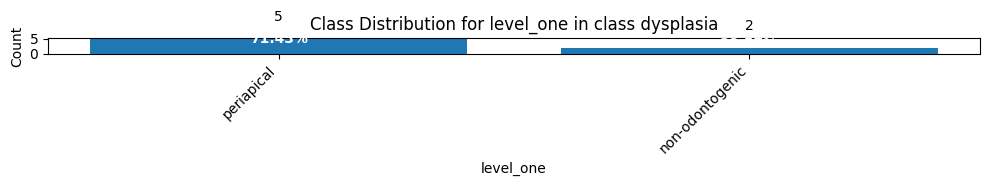

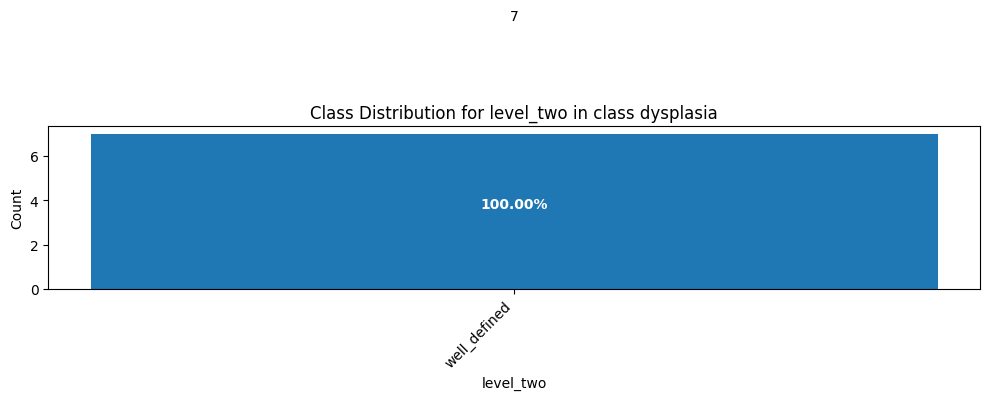

<ipython-input-134-4c9852e2c54a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


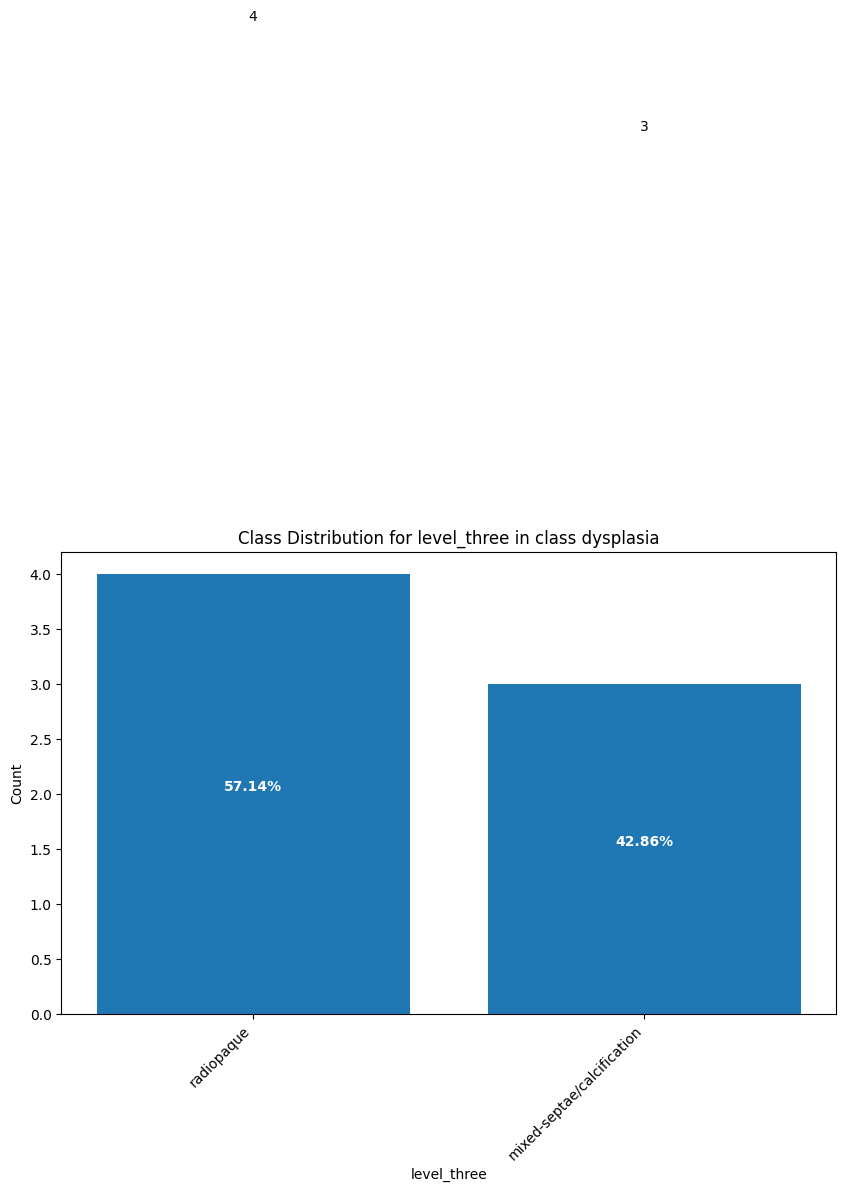

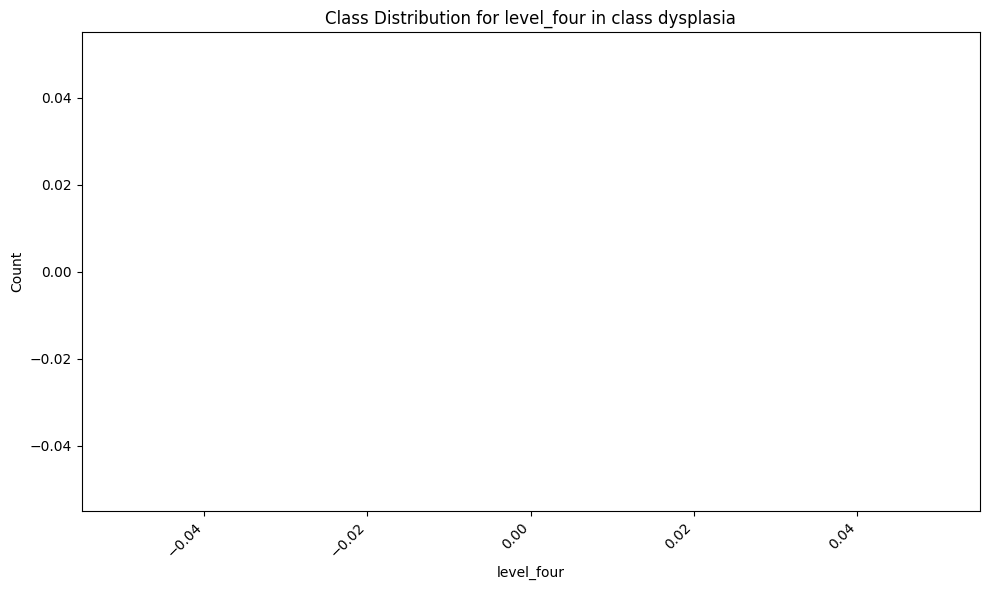

Dataframe for class: nan


,External ID,level_one,level_two,level_three,level_four,level_five
1004,284.JPG,NaN,NaN,NaN,NaN,nan



--------------------------------------------------------------------------------



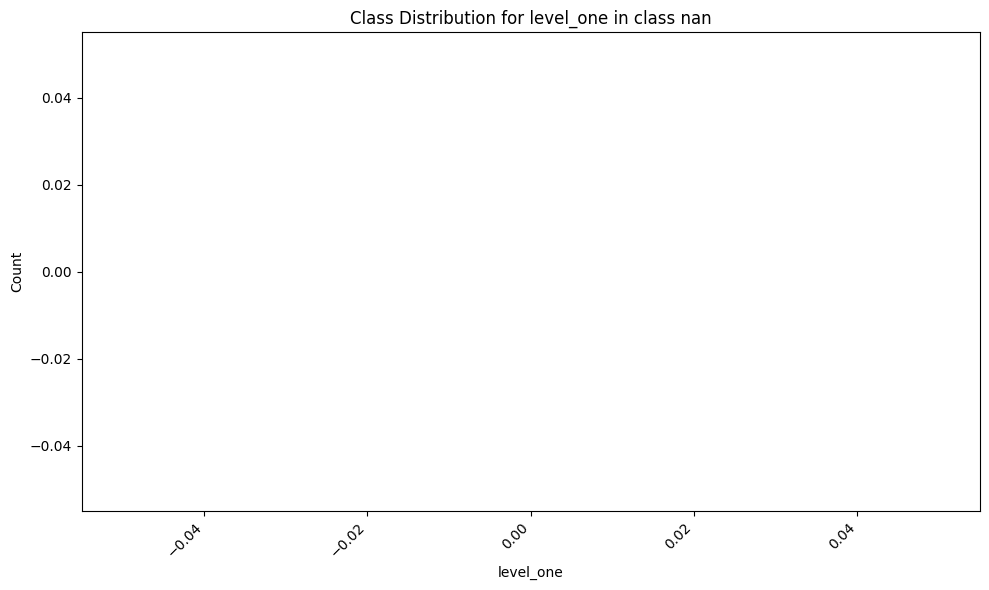

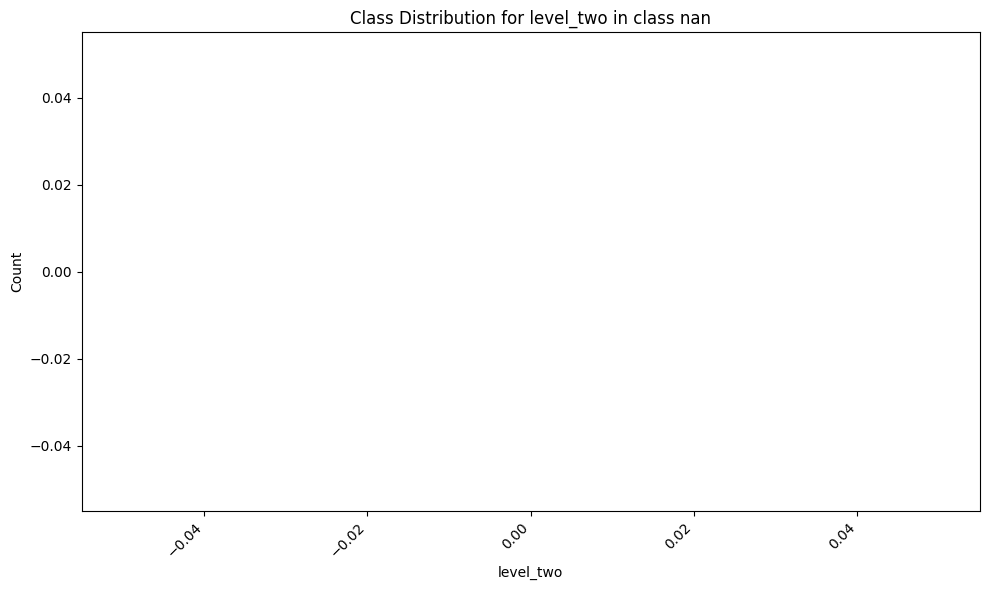

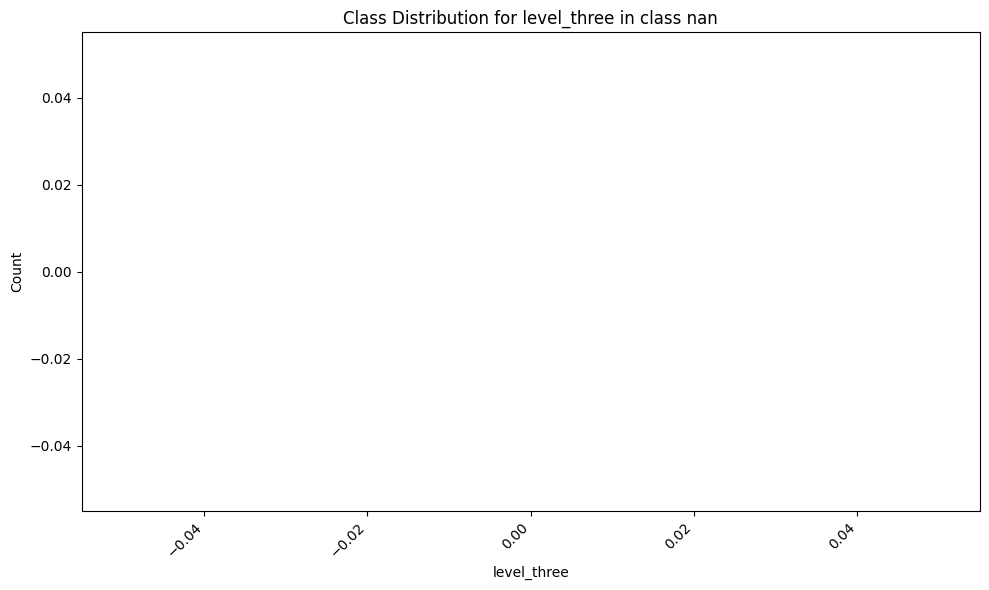

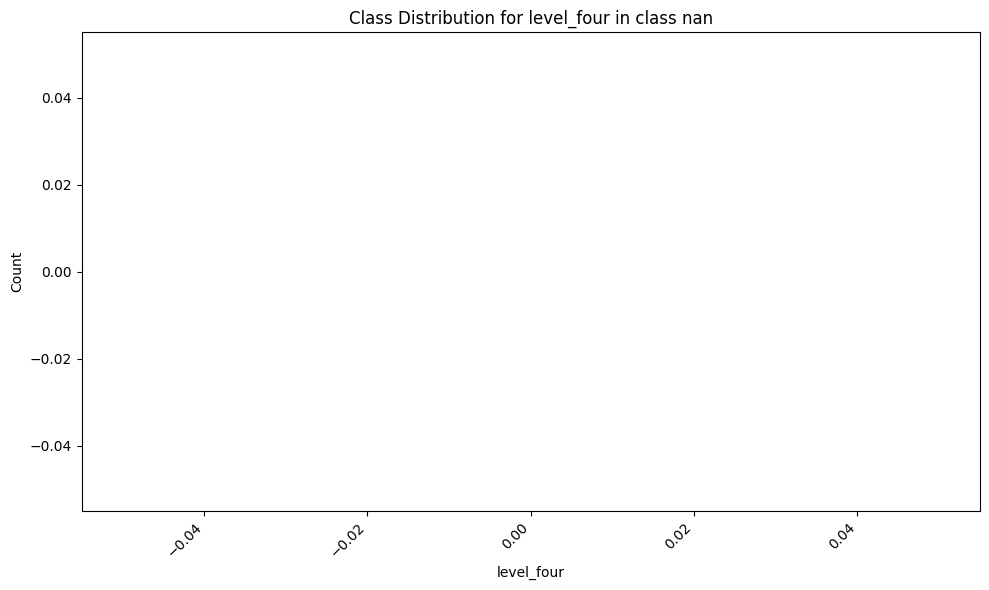

Dataframe for class: malignant_neoplasia


,External ID,level_one,level_two,level_three,level_four,level_five
1023,336.JPG,periapical,ill_defined,radiolucent,NaN,'malignant_neoplasia'
1026,532.JPG,periapical,ill_defined,radiolucent,NaN,'malignant_neoplasia'



--------------------------------------------------------------------------------



<ipython-input-134-4c9852e2c54a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


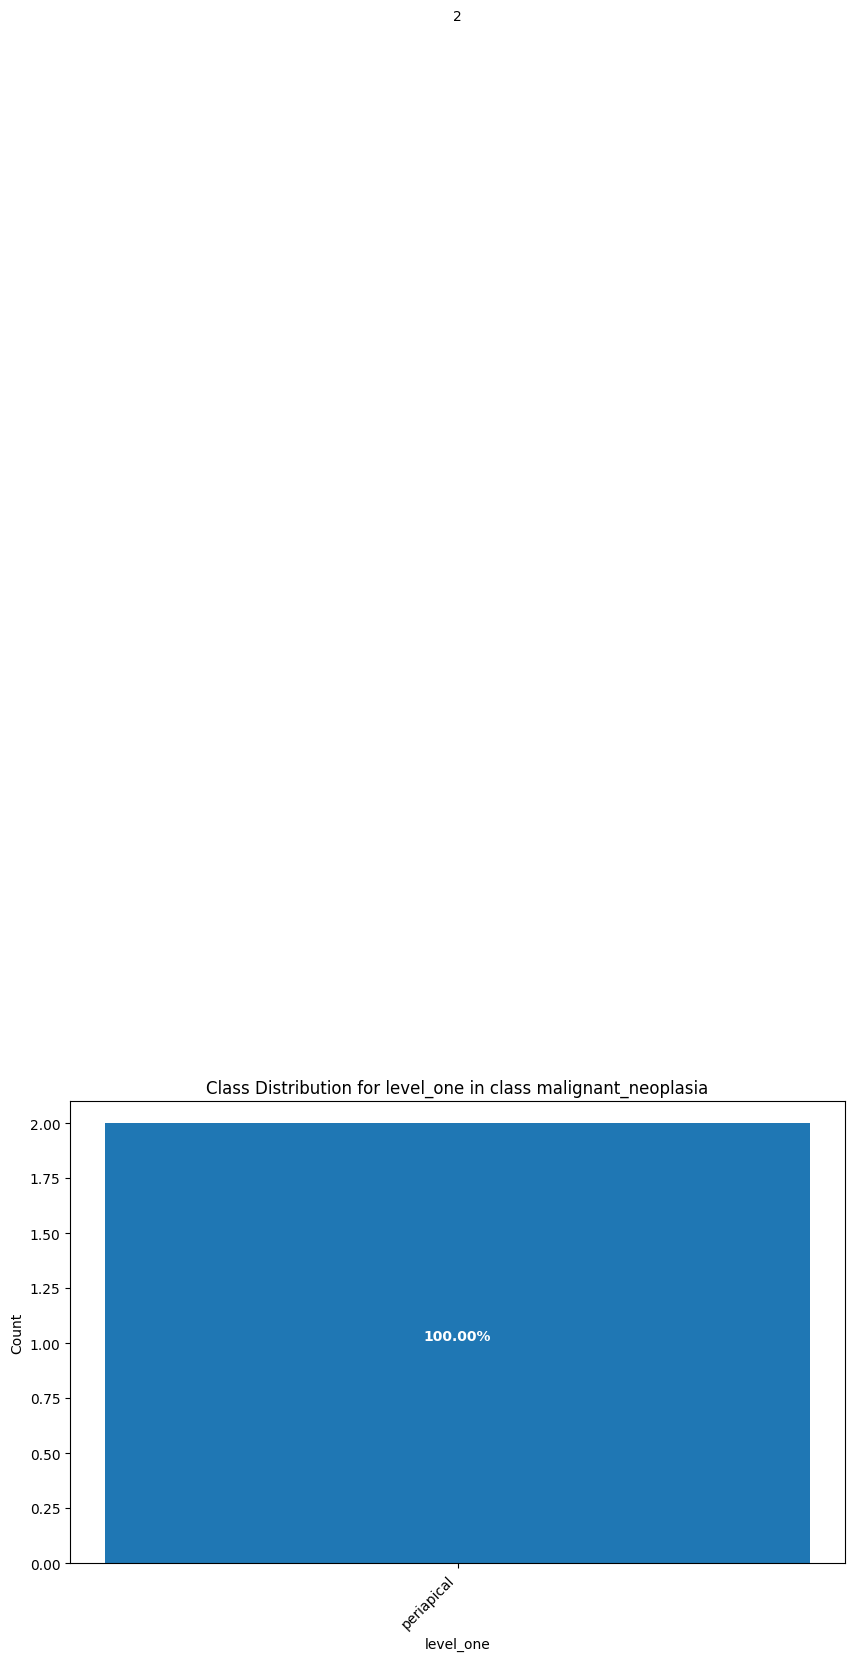

<ipython-input-134-4c9852e2c54a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


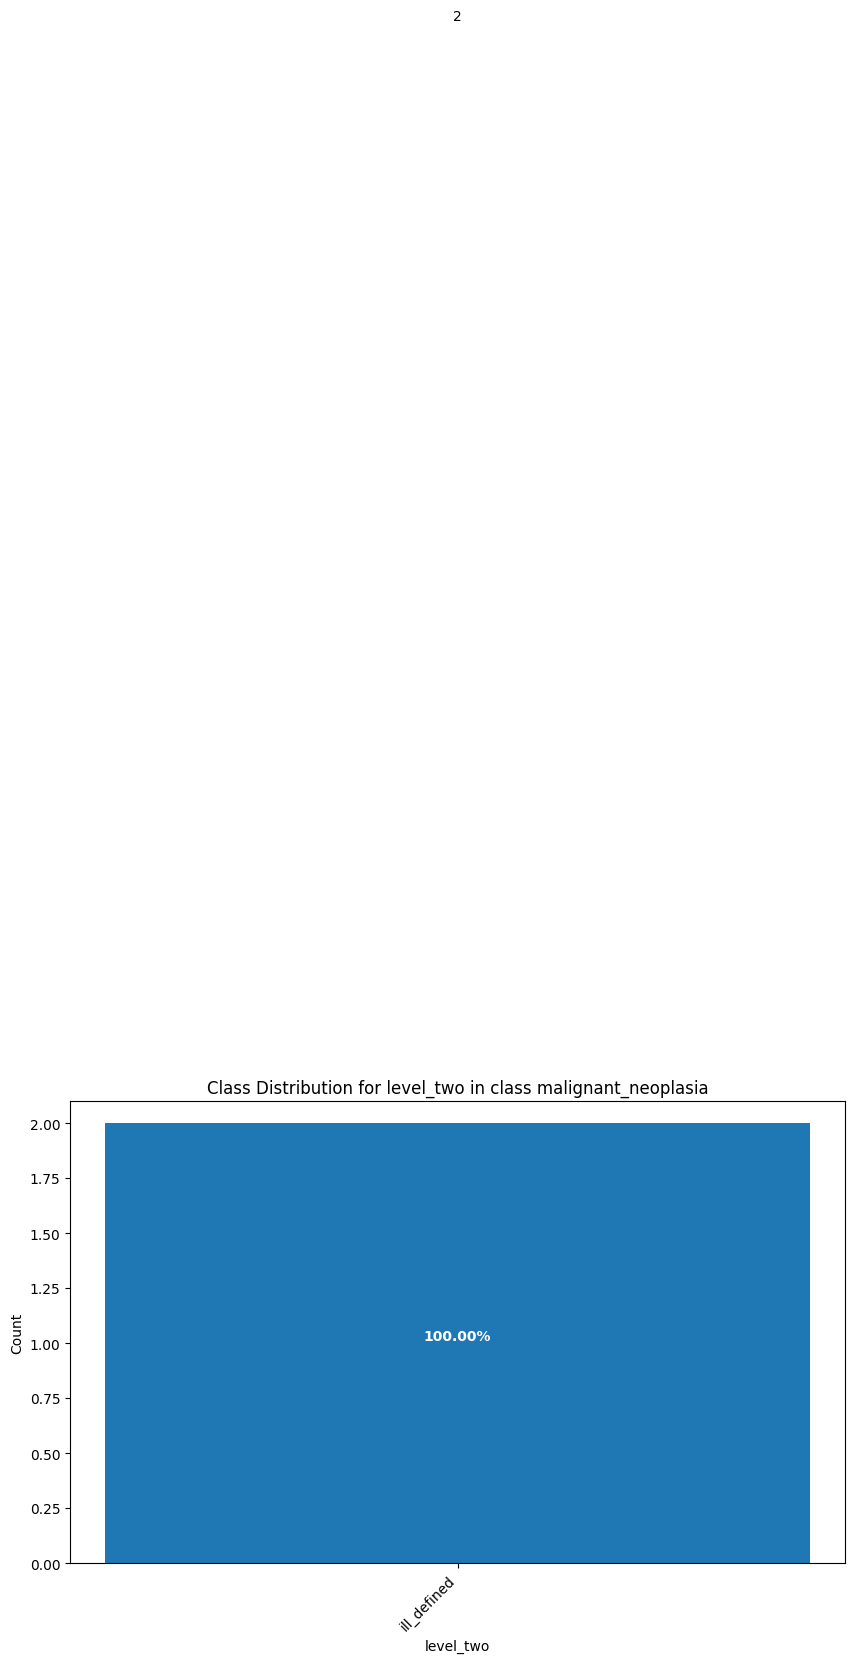

<ipython-input-134-4c9852e2c54a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


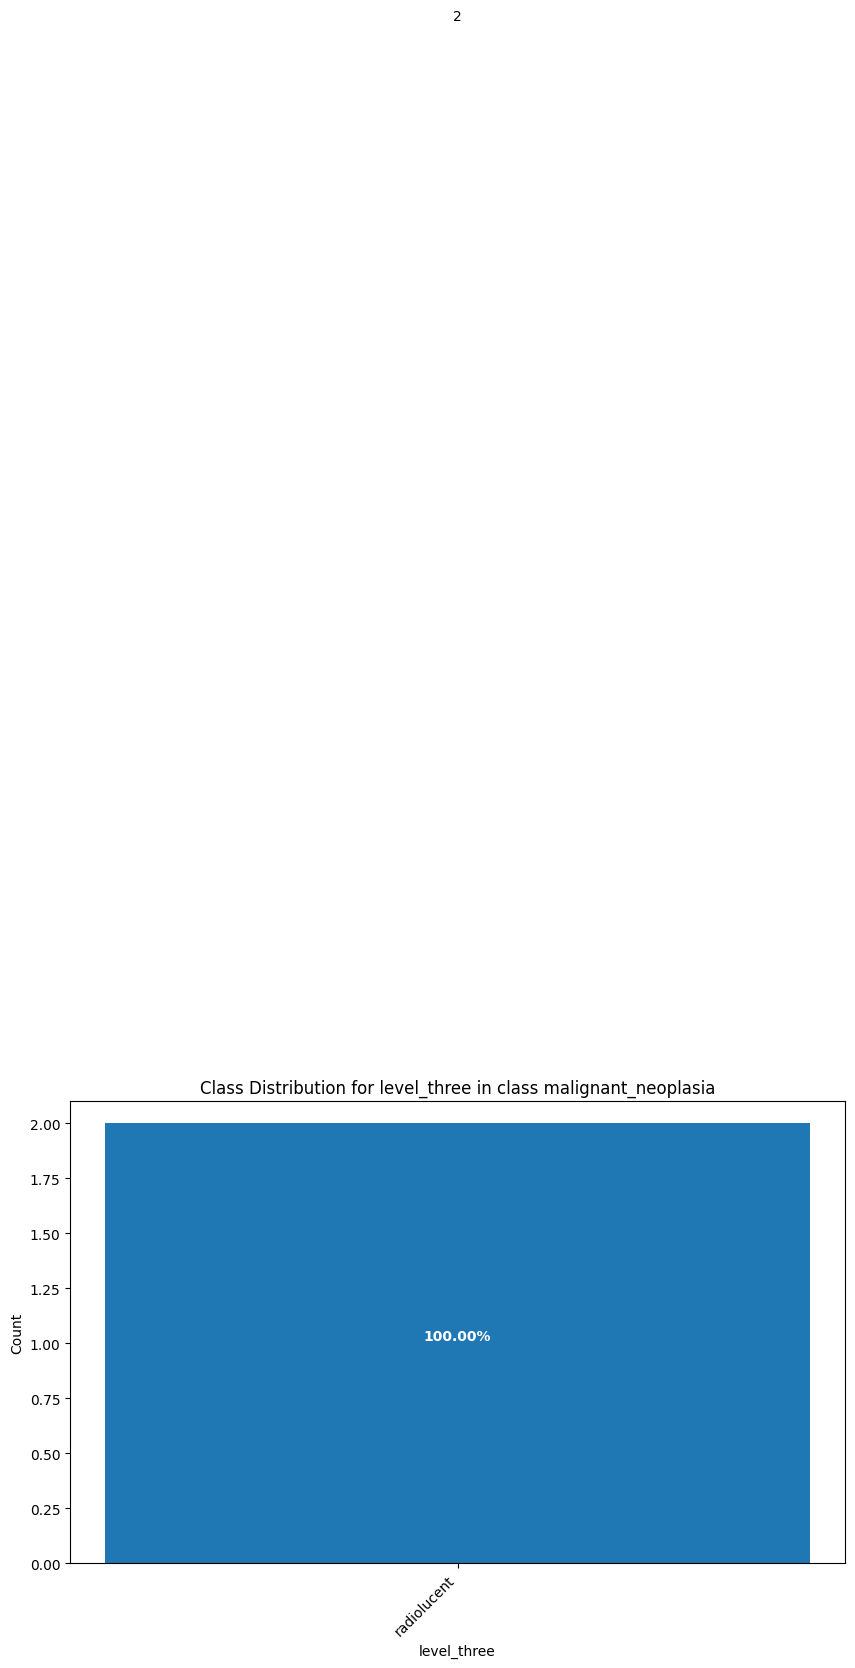

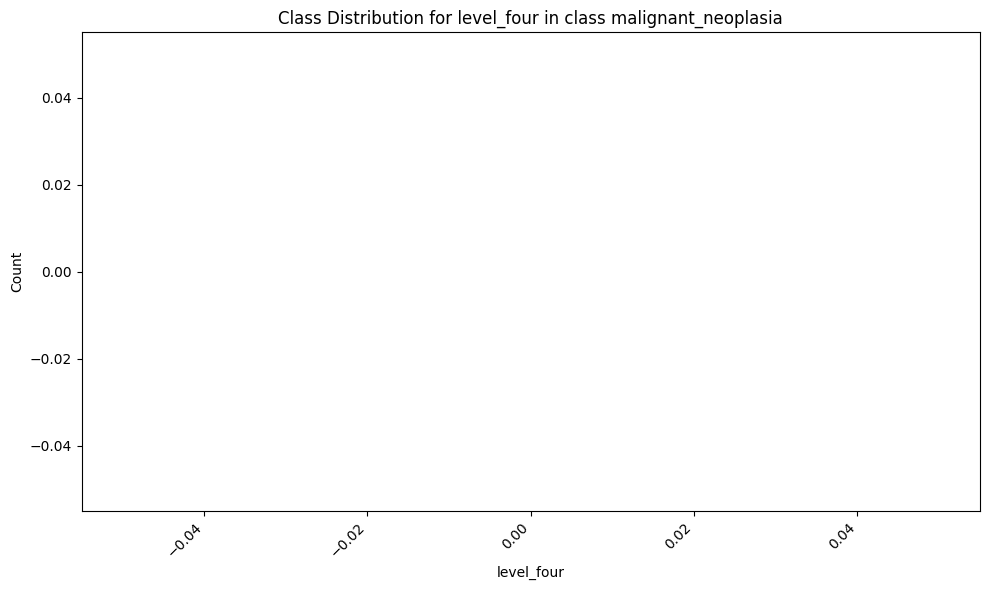

In [134]:
import pandas as pd
from IPython.display import display

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Load the provided CSV file
cleaned_df = abnormal_df

# Identify the unique classes in the level_five column (excluding NaN values)
unique_classes = [cls for cls in cleaned_df['level_five'].unique() if pd.notna(cls)]

# Create a dictionary to store dataframes for each class
class_dataframes = {}

# Populate the dictionary with dataframes for each class
for cls in unique_classes:
    # Extract the actual class name from the string representation
    actual_class = cls.strip("'")
    class_dataframes[actual_class] = cleaned_df[cleaned_df['level_five'] == cls]

# Display the dataframe for each class
for cls, df in class_dataframes.items():
    print(f"Dataframe for class: {cls}")
    display(df)  # Display the entire dataframe
    print("\n" + "-"*80 + "\n")  # Separator for clarity

    df = class_dataframes[cls]

    for level_column in ['level_one', 'level_two', 'level_three', 'level_four']:
        if level_column in df.columns:
            class_counts = df[level_column].value_counts()
            total = class_counts.sum()
            fig, ax = plt.subplots(figsize=(10, 6))
            bars = ax.bar(class_counts.index, class_counts.values)
            for bar in bars:
                yval = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', color='black')
            for bar in bars:
                yval = bar.get_height()
                percentage = (yval / total) * 100
                ax.text(bar.get_x() + bar.get_width()/2, yval / 2, f"{percentage:.2f}%", ha='center', va='bottom', color='white', fontsize=10, fontweight='bold')
            ax.set_title(f'Class Distribution for {level_column} in class {cls}')
            ax.set_ylabel('Count')
            ax.set_xlabel(level_column)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()




Malignant neoplasia is not plotted since they are just 2 instances